# メインプログラム

In [4]:
# これがメインプログラムです
# # ログを作って、

import gym
import os
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from tensorflow.python.compiler import tensorrt as trt
from stable_baselines.bench import Monitor
import mujoco_py
from gym.envs.mujoco import MuJocoPyEnv
stepcounter = 0



# ログフォルダの生成 (1)
log_dir = './logs/'
os.makedirs(log_dir, exist_ok=True)

# 環境の生成
env = gym.make('Ant-v4')
env = Monitor(env, log_dir, allow_early_resets=True) # (2)
env = DummyVecEnv([lambda: env])

# モデルの生成
# model = PPO.load('sample',env) #保存した学習結果を読み込んだ環境を持ってきて続きから始められる
# model = PPO.set_parameters('sample')
model = PPO('MlpPolicy', env, verbose=1) #環境を新規に作成

# モデルの学習
model.learn(total_timesteps=100)#10万回あたり６分かかります

# モデルのテスト
state = env.reset()
for i in range(400):
    # 環境の描画
    env.render()

    # モデルの推論
    action, _ = model.predict(state)

    # 1ステップ実行
    state, rewards, done, info = env.step(action)
    # print(mujoco_py.PyMjData.get_body_xpos('torso'))

    # エピソード完了
    if done:
        break
# モデルの保存 (1)
model.save('test')
# 環境のクローズ
env.close()

Exception: Please add mujoco library to your PATH:
set PATH=C:\Users\atusi\.mujoco\mujoco210\bin;%PATH%

In [6]:

4 * 125 *2- 2 *2 

996

# グラフ表示するコード

In [1]:
#Monitorログをグラフ表示するコード

import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
# monitor.csvの読み込み (1)
df = pd.read_csv('MjDataLogxpos.csv', names=['x座標', 'y座標','z座標'])
# df = df.drop(range(2)) # 1〜2行目の削除

# 報酬のグラフの表示 (2)
x = range(len(df['x座標'])) # エピソードのインデックス
y = df['x座標'].astype(float) # 報酬
plt.plot(x, y)
plt.xlabel('episode')
plt.ylabel('reward')
plt.show()
plt.figure(figsize=(20,8))
# エピソード長のグラフの表示 (2)
x = range(len(df['l'])) # エピソードのインデックス
y = df['l'].astype(float) # エピソード長
plt.plot(x, y)
plt.xlabel('episode')
plt.ylabel('episode len')
plt.show()

ValueError: could not convert string to float: 'x座標'

<Figure size 1440x576 with 0 Axes>

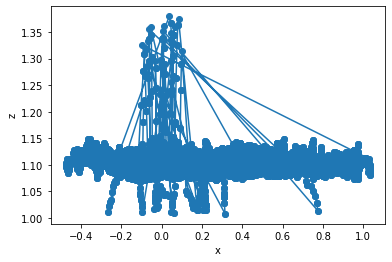

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

input_csv = pd.read_csv('MjDataLogxpos.csv')
first_column_data = input_csv[input_csv.keys()[0]]
second_column_data = input_csv[input_csv.keys()[2]]

plt.xlabel(input_csv.keys()[0])
plt.ylabel(input_csv.keys()[2])

plt.plot(first_column_data, second_column_data, linestyle='solid', marker='o')
plt.show()


# 保存したモデルを読み込み、テストするコード

In [11]:
#保存したモデルを読み込み、テストするコード

import gym
from stable_baselines3.common.vec_env import DummyVecEnv
from tensorflow.python.compiler import tensorrt as trt
from stable_baselines3 import PPO
sumrewards = 0

# 環境の生成
env = gym.make('Pusher-v4')
env = DummyVecEnv([lambda: env])

# モデルの読み込み (1)
model = PPO.load('thrower_GPTver/thrower_GPTverinit_step420000steps')

# モデルのテスト
state = env.reset()
for i in range(500):
    # 環境の描画
    env.render()

    # モデルの推論
    action, _ = model.predict(state)

    # 1ステップ実行
    state, rewards, done, info = env.step(action)
    print(rewards)
    sumrewards += rewards
    print('報酬のステップ平均'+str(sumrewards/step))

    # エピソード完了
    if done:
        break

# print('報酬のステップ平均'+str(sumrewards/step))

# 環境のクローズ
env.close()

<class 'mujoco._structs.MjModel'>
boundstype：<class 'numpy.ndarray'>
[[-10.  10.]
 [-10.  10.]
 [-10.  10.]
 [-10.  10.]
 [-25.  25.]
 [-15.  15.]
 [-25.  25.]]
lowtype：<class 'numpy.ndarray'>
[-10. -10. -10. -10. -25. -15. -25.]
hightype：<class 'numpy.ndarray'>
[10. 10. 10. 10. 25. 15. 25.]
action_space_type：<class 'gym.spaces.box.Box'>
Box([-10. -10. -10. -10. -25. -15. -25.], [10. 10. 10. 10. 25. 15. 25.], (7,), float32)


/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


[-0.5618351]
[-0.56500524]
[-0.5870439]
[-0.62391174]
[-0.65939516]
[-0.7306587]
[-0.7866624]
[-0.78190297]
[-0.76088196]
[-0.69311017]
[-0.66499317]
[-0.55942106]
[-0.5403693]
[-0.5168082]
[-0.51070493]
[-0.5137585]
[-0.5054857]
[-0.50635844]
[-0.50578725]
[-0.50229025]
[-0.50360197]
[-0.50255054]
[-0.5076777]
[-0.5031829]
[-0.5050629]
[-0.5060091]
[-0.5069106]
[-0.5046911]
[-0.50565124]
[-0.50602585]
[-0.5042277]
[-0.50997984]
[-0.50322497]
[-0.50226724]
[-0.5062683]
[-0.5052816]
[-0.5063218]
[-0.506408]
[-0.5096408]
[-0.50831336]
[-0.5109553]
[-0.5171279]
[-0.5108574]
[-0.51028824]
[-0.51513094]
[-0.5107799]
[-0.5200734]
[-0.5104597]
[-0.50687665]
[-0.5113361]
[-0.52125025]
[-0.5147267]
[-0.5165302]
[-0.5146422]
[-0.52067554]
[-0.51911664]
[-0.5084566]
[-0.51481336]
[-0.52037024]
[-0.5184852]
[-0.5211937]
[-0.51209545]
[-0.5266731]
[-0.52577937]
[-0.52479297]
[-0.5315423]
[-0.50972307]
[-0.51548934]
[-0.5163366]
[-0.5167663]
[-0.52016133]
[-0.51735723]
[-0.5320745]
[-0.5201628]
[-0.

NameError: name 'step' is not defined

In [7]:
import my_function as aa
aa.auto_field_recreate()

start_creating_randamfield
摩擦ランダム範囲は0.07390599501180199です

SUCSESS!created_randamfield
出力しました


# 何度もテストするコード

In [1]:
#保存したモデルを読み込み、何度もテストするコード

import gym
from stable_baselines3.common.vec_env import DummyVecEnv
from tensorflow.python.compiler import tensorrt as trt
from stable_baselines3 import PPO
import pprint
import mujoco_py
import my_function
# for epsode in range(160):
my_function.auto_field_recreate() #フィールドを作り直す（更新する）
# 環境の生成
env = gym.make('Humanoid-v4')
env = DummyVecEnv([lambda: env])

# モデルの読み込み (1)
model = PPO.load('Humanoid1/Humanoid1init_step34050000steps')



# モデルのテスト
for epsode in range(15):
    state = env.reset()
    # my_function.auto_field_recreate() #フィールドを作り直す（更新する）
    for i in range(900):
    # 環境の描画
        env.render()

        # モデルの推論
        action, _ = model.predict(state)

        # 1ステップ実行
        state, rewards, done, info = env.step(action)
        # info = info[0]
        
        # print(info[0]['x_position'])
        # info['step'] = i
        #pprint.pprint((info),sort_dicts=False)
        
        # print("-"*20)
        # エピソード完了
    if done:
        break

# 環境のクローズ
env.close()

/home/shibuya/.local/lib/python3.8/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
2023-02-19 00:08:41.054140: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-19 00:08:41.184782: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shibuya/.local/lib/python3.8/site-packages/cv2/../../lib64:$LD_LIBRARY_PATH:/home/shibuya/.mujoco/mujoco210/bin:/usr/lib/nvidia
2023-02-19 00:08:41.184803: I ten

start_creating_randamfield
摩擦ランダム範囲は0.13747347562035317です

SUCSESS!created_randamfield
出力しました
<class 'mujoco._structs.MjModel'>
boundstype：<class 'numpy.ndarray'>
[[-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]]
lowtype：<class 'numpy.ndarray'>
[-0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4
 -0.4 -0.4 -0.4]
hightype：<class 'numpy.ndarray'>
[0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
action_space_type：<class 'gym.spaces.box.Box'>
Box(-0.4, 0.4, (17,), float32)


/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/shibuya/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GT 710 which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major,

start_creating_randamfield
摩擦ランダム範囲は0.1198502039378939です

SUCSESS!created_randamfield
出力しました


/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


start_creating_randamfield
摩擦ランダム範囲は0.23381860357543915です

SUCSESS!created_randamfield
出力しました
start_creating_randamfield
摩擦ランダム範囲は0.27435168113735786です

SUCSESS!created_randamfield
出力しました


/home/shibuya/.local/lib/python3.8/site-packages/glfw/__init__.py:906: GLFWError: (65537) b'The GLFW library is not initialized'
  warnings.warn(message, GLFWError)


start_creating_randamfield
摩擦ランダム範囲は0.25682233806667415です

SUCSESS!created_randamfield
出力しました
start_creating_randamfield
摩擦ランダム範囲は0.13124138957206755です

SUCSESS!created_randamfield
出力しました
start_creating_randamfield
摩擦ランダム範囲は0.19866906994035677です

SUCSESS!created_randamfield
出力しました
start_creating_randamfield
摩擦ランダム範囲は0.21981439534489128です

SUCSESS!created_randamfield
出力しました
start_creating_randamfield
摩擦ランダム範囲は0.05649515518627855です

SUCSESS!created_randamfield
出力しました
start_creating_randamfield
摩擦ランダム範囲は0.21657516414338135です

SUCSESS!created_randamfield
出力しました
start_creating_randamfield
摩擦ランダム範囲は0.2421234987039626です

SUCSESS!created_randamfield
出力しました
start_creating_randamfield
摩擦ランダム範囲は0.14653719797090614です

SUCSESS!created_randamfield
出力しました
start_creating_randamfield
摩擦ランダム範囲は0.10322816410414211です

SUCSESS!created_randamfield
出力しました
start_creating_randamfield
摩擦ランダム範囲は0.27339898089691794です

SUCSESS!created_randamfield
出力しました


KeyboardInterrupt: 

In [13]:
import mujoco_py
mujoco_py.MjSim.data('torso')

TypeError: 'getset_descriptor' object is not callable

: 

# 追加学習させるコード

In [4]:
# 追加学習をさせる方法

# ログを作って、

import gym
import os
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from tensorflow.python.compiler import tensorrt as trt
from stable_baselines.bench import Monitor
from stable_baselines3.common.callbacks import EvalCallback

# Separate evaluation env
# eval_env = gym.make('Humanoid-v4')
# Use deterministic actions for evaluation
# eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/',log_path='./logs/', eval_freq=500,deterministic=True, render=True)

# ログフォルダの生成 (1)
log_dir = './logs/'
os.makedirs(log_dir, exist_ok=True)

# 環境の生成
env = gym.make('Ant-v4')
env = Monitor(env, log_dir, allow_early_resets=True) # (2)
env = DummyVecEnv([lambda: env])

# モデルの生成
model = PPO.load('pereppee',env) # こう書くことで、保存してある学習データと環境をを持って来ることができて、その続きを学習させられる
# model = PPO.set_parameters('sample')
# model = PPO('MlpPolicy', env, verbose=1) #ここは新規作成の欄

# モデルの学習
model.learn(total_timesteps=10000) #10万回あたり６分かかります
# ,callback=eval_callback)
# print(self.sim.data.qpos.flat,self.sim.data.qvel.flat)//zざひょうのあたいをみたい！

# モデルのテスト
# for epsode in range(100):
state = env.reset()
for i in range(400):
    # 環境の描画
    env.render()

    # モデルの推論
    action, _ = model.predict(state)

    # 1ステップ実行
    state, rewards, done, info = env.step(action)

    # エピソード完了
    if done:
        break
# モデルの保存 (1)
model.save('pereppee')#
# 環境のクローズ
env.close()#IMUセンサとか追加して、体がぶれないように報酬を設定したりすることもしてみたい！！！！筋肉も

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 407      |
|    ep_rew_mean     | 403      |
| time/              |          |
|    fps             | 443      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 505         |
|    ep_rew_mean          | 501         |
| time/                   |             |
|    fps                  | 342         |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.021268629 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -15.6       |
|    explained_variance   | 0.602       |
|    learning_rate        | 0.

これからの予定

２．色んな場所のログを取る⇨Sensorタグを使えばいけそう！
３．IMUセンサを取り付けて状態空間に入れて、その値を報酬に関わるようにしたら、変な歩き方しなくなるかも！！やりたい
１．状態空間に何が含まれているか、何を見ているかを調べる
筋力徐々に低下実験のやり方

# ログを定期的にとりながら学習し続けるプログラム

In [2]:
# 定期保存追加学習１/２

# ログを作って、

import gym
import os
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from tensorflow.python.compiler import tensorrt as trt
from stable_baselines.bench import Monitor
from stable_baselines3.common.callbacks import EvalCallback

# Separate evaluation env
# eval_env = gym.make('Humanoid-v4')
# Use deterministic actions for evaluation
# eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/',log_path='./logs/', eval_freq=500,deterministic=True, render=True)

# ログフォルダの生成 (1)
log_dir = './logs/'
os.makedirs(log_dir, exist_ok=True)

# 環境の生成
env = gym.make('Ant-v4')
env = Monitor(env, log_dir, allow_early_resets=True) # (2)
env = DummyVecEnv([lambda: env])



title_name = 'gravitest'
init_step = 0
first_step = 0
HowManyStepPerSave = 2000
HowManyLoop = 5
Now_Loop = 0

bot = LINENotifyBot(access_token='aHwsSGlYHfLYC7Wdl4iFXxQ13mN8TaA6VLiUuithsKk')

#＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃



/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
#定期保存追加学習2/2
HowManyStepPerSave = 2000
HowManyLoop = 700
Now_Loop = 0
first_step = 0

print('確認：init_stepは' + str(init_step) + 'です')
# モデルの生成
#model = PPO.load(title_name+str(init_step),env) # こう書くことで、保存してある学習データと環境をを持って来ることができて、その続きを学習させられる
# model = PPO.set_parameters('sample')
# model = PPO('MlpPolicy', env, verbose=1) #ここは新規作成の欄
import gym
import os
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from tensorflow.python.compiler import tensorrt as trt
from stable_baselines.bench import Monitor
from stable_baselines3.common.callbacks import EvalCallback


print(str(init_step) + '回目からスタートし、' + str(HowManyStepPerSave) + ' 回の 学習を ' + str(HowManyLoop) + ' セット 学習させます.１セットごとにモデルを保存します')

for num in range(HowManyLoop):
    

    # Separate evaluation env
    # eval_env = gym.make('Humanoid-v4')
    # Use deterministic actions for evaluation
    # eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/',log_path='./logs/', eval_freq=500,deterministic=True, render=True)

    # ログフォルダの生成 (1)
    log_dir = './logs/'
    # おためしlog_dir = "./title_name + 'init_step' + str(init_step + HowManyStepPerSave*Now_Loop) + 'steps'/"
    os.makedirs(log_dir, exist_ok=True)

    # 環境の生成
    env = gym.make('Ant-v4')
    env = Monitor(env, log_dir, allow_early_resets=True) # (2) #env.closeをループの外に出せば、全部のログが取れそう closeするまでのログを取っている？？
    env = DummyVecEnv([lambda: env])

    print('確認：init_stepは' + str(init_step) + 'です')

    if init_step == 0 and first_step == 0:
        model = PPO('MlpPolicy', env, verbose=1) #環境を新規に作成
        first_step = 1
        print('checkpoint:if文のなかを通過しました.環境を新しく作成します')
        
    else:
        model = PPO.load(title_name + 'init_step' + str(init_step + HowManyStepPerSave*num) + 'steps',env) # こう書くことで、保存してある学習データと環境をを持って来ることができて、その続きを学習させられる
        print('checkpoint:else文のなかを通過しました.追加学習します')

    
    Now_Loop = Now_Loop+1

    # モデルの学習
    model.learn(total_timesteps = HowManyStepPerSave) #10万回あたり６分かかります
    # ,callback=eval_callback)
    # print(self.sim.data.qpos.flat,self.sim.data.qvel.flat)//zざひょうのあたいをみたい！

    # モデルのテスト
    # for epsode in range(100):
    state = env.reset()
    for i in range(400):
        # 環境の描画
        env.render()

        # モデルの推論
        action, _ = model.predict(state)

        # 1ステップ実行
        state, rewards, done, info = env.step(action)

        # エピソード完了
        if done:
            break
    # モデルの保存 (1)
    model.save(title_name + 'init_step' + str(init_step + HowManyStepPerSave*Now_Loop) + 'steps')
    print('ファイル名を' + title_name + 'init_step' + str(init_step + HowManyStepPerSave*Now_Loop) + 'steps' + 'で保存しました')
    print(str(HowManyLoop)+ 'セット中' + str(Now_Loop) +'セット終わりました。現在は' + str(init_step + HowManyStepPerSave*Now_Loop) + 'ステップ終わったところです。')
    # 環境のクローズ
    env.close()
    

print(str(HowManyLoop)+ 'セット中' + str(Now_Loop) +'セット終わりました')

init_step = init_step + HowManyLoop * HowManyStepPerSave
print('init_step変数を更新しました。すぐに続きの' + str(init_step) + 'ステップ目から学習できます')
Now_Loop=0







確認：init_stepは0です
0回目からスタートし、2000 回の 学習を 700 セット 学習させます.１セットごとにモデルを保存します
確認：init_stepは0です
Using cuda device


/home/shibuya/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GT 710 which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


checkpoint:if文のなかを通過しました.環境を新しく作成します
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14.4     |
|    ep_rew_mean     | 13.7     |
| time/              |          |
|    fps             | 252      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------


/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


ファイル名をgravitestinit_step2000stepsで保存しました
700セット中1セット終わりました。現在は2000ステップ終わったところです。
確認：init_stepは0です
checkpoint:else文のなかを通過しました.追加学習します
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13       |
|    ep_rew_mean     | 12.3     |
| time/              |          |
|    fps             | 248      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------
ファイル名をgravitestinit_step4000stepsで保存しました
700セット中2セット終わりました。現在は4000ステップ終わったところです。
確認：init_stepは0です
checkpoint:else文のなかを通過しました.追加学習します
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14.6     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    fps             | 263      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------
ファイル名をgravitestinit_step6000stepsで保存しました
700セット中3セット終わ

KeyboardInterrupt: 

# LINE機能拡張版追加学習コード！！！！

In [1]:
#LINE BOT  ON

import requests

class LINENotifyBot(object):
    API_URL = 'https://notify-api.line.me/api/notify'
    def __init__(self, access_token):
        self.__headers = {'Authorization': 'Bearer ' + access_token}

    def send(
        self,
        message,
        image=None,
        sticker_package_id=None,
        sticker_id=None,
    ):
        payload = {
            'message': message,
            'stickerPackageId': sticker_package_id,
            'stickerId': sticker_id,
        }
        files = {}
        if image != None:
            files = {'imageFile': open(image, 'rb')}
        r = requests.post(
            LINENotifyBot.API_URL,
            headers=self.__headers,
            data=payload,
            files=files,
        )


bot = LINENotifyBot(access_token='UuzEJNM69oW7g0suO2FsWygFKvSK4vj7HnEBFLyi0mc')
bot.send(
message="LINE BOTを起動します。 \n 大量の通知が行きます",
#image='picf' + str(i) + '.png',  # png or jpg
sticker_package_id=1,
sticker_id=6,
)
print("LINE BOTを起動します。 \n 大量の通知が行きます")

LINE BOTを起動します。 
 大量の通知が行きます


In [1]:
# 定期保存追加学習１/２ # LINE BOT ON

# ログを作って、

import gym
import os
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from tensorflow.python.compiler import tensorrt as trt
from stable_baselines.bench import Monitor
from stable_baselines3.common.callbacks import EvalCallback
import datetime


# Separate evaluation env
# eval_env = gym.make('Humanoid-v4')
# Use deterministic actions for evaluation
# eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/',log_path='./logs/', eval_freq=500,deterministic=True, render=True)

# ログフォルダの生成 (1)
log_dir = './logs/'
os.makedirs(log_dir, exist_ok=True)

# 環境の生成
env = gym.make('Humanoid-v4')
env = Monitor(env, log_dir, allow_early_resets=True) # (2)
env = DummyVecEnv([lambda: env])


dt_now = datetime.datetime.now()
# DATE=dt_now.strftime('%Y%m%d_%H,%M,%S')#シンプル版
DATE=dt_now.strftime('%Y年%m月%d日 %H時%M分%S秒')#日本語でわかりやすい表記版
title_name = 'Humanoid1'
init_step = 18150000
first_step = 0
HowManyStepPerSave = 100000
HowManyLoop = 10000
Now_Loop = 0
sumrewards = 0
step = 100


# bot = LINENotifyBot(access_token='aHwsSGlYHfLYC7Wdl4iFXxQ13mN8TaA6VLiUuithsKk')

bot.send(
message=
'初期パラメータ \n' + 
# '学習を始めた時間：' + DATE + '\n' + 
'title_name：' + str(title_name) + '\n \n' + 
'init_step：' + str(init_step) + '  ←要確認！\n \n' + 
'first_step：' + str(first_step) + '\n' + 
'HowManyStepPerSave：' + str(HowManyStepPerSave) + '\n' + 
'HowManyLoop：' + str(HowManyLoop) + '\n' + 
'sumrewards：' + str(sumrewards) + '\n' + 
'step：' + str(step) + '\n'
#image='picf' + str(i) + '.png',  # png or jpg
# sticker_package_id=1,
# sticker_id=13,
)

#＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃



ModuleNotFoundError: No module named 'gym'

In [5]:
import my_function as aa
aa.auto_field_recreate()

start_creating_randamfield
摩擦ランダム範囲は0.10844993674682916です

SUCSESS!created_randamfield
出力しました


In [7]:
HowManyStepPerSave = 20000
HowManyLoop = 50

In [4]:
#定期保存追加学習2/2             &LINE BOT

# HowManyStepPerSave = 2000
# HowManyLoop = 10

print('確認：init_stepは' + str(init_step) + 'です')
# モデルの生成
#model = PPO.load(title_name+str(init_step),env) # こう書くことで、保存してある学習データと環境をを持って来ることができて、その続きを学習させられる
# model = PPO.set_parameters('sample')
# model = PPO('MlpPolicy', env, verbose=1) #ここは新規作成の欄
import gym
import os
import time
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from tensorflow.python.compiler import tensorrt as trt
from stable_baselines.bench import Monitor
from stable_baselines3.common.callbacks import EvalCallback
import datetime
import my_function
start_time = datetime.datetime.now().replace(microsecond=0)
#DATE=dt_now.strftime('%Y年%m月%d日 %H時%M日%S秒')


print(str(init_step) + '回目からスタートし、' + str(HowManyStepPerSave) + ' 回の 学習を ' + str(HowManyLoop) + ' セット 学習させます.１セットごとにモデルを保存します')
bot.send(
message=str(init_step) + '回目からスタートし、' + str(HowManyStepPerSave) + ' 回の 学習を ' + str(HowManyLoop) + ' セット 学習させます.１セットごとにモデルを保存します',
#image='picf' + str(i) + '.png',  # png or jpg
# sticker_package_id=1,
# sticker_id=13,
)

for num in range(HowManyLoop):
    

    # Separate evaluation env
    # eval_env = gym.make('Humanoid-v4')
    # Use deterministic actions for evaluation
    # eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/',log_path='./logs/', eval_freq=500,deterministic=True, render=True)

    # ログフォルダの生成 (1)
    log_dir = './logs/'

    # おためしlog_dir = "./title_name + 'init_step' + str(init_step + HowManyStepPerSave*Now_Loop) + 'steps'/"
    os.makedirs(log_dir, exist_ok=True)

    # 環境の生成
    env = gym.make('Humanoid-v4')
    env = Monitor(env, log_dir, allow_early_resets=True) # (2) #env.closeをループの外に出せば、全部のログが取れそう closeするまでのログを取っている？？
    env = DummyVecEnv([lambda: env])

    print('確認：init_stepは' + str(init_step) + 'です')

    if init_step == 0 and first_step == 0:
        model = PPO('MlpPolicy', env, verbose=2) #環境を新規に作成
        first_step = 1
        print('checkpoint:if文のなかを通過しました.環境を新しく作成します')
        
        bot.send(
        message="checkpoint:if文のなかを通過しました.環境を新しく作成します",
        #image='picf' + str(i) + '.png',  # png or jpg
        # sticker_package_id=1,
        # sticker_id=13,
    )
        ##################メモを作って学習日時を記録！！############################
        os.makedirs('./'+title_name, exist_ok=True)
        f = open(title_name +'/'+'Learn_Date_and_time.txt', 'w')
        f.write("新規記録：新規で" + DATE + "に学習開始されました\n")
        f.close()
        print('ifで新規作成したことをメモに書きました')
        ##################メモを作って学習日時を記録！！############################
        
    else:
        model = PPO.load(title_name + '/' +title_name + 'init_step' + str(init_step + HowManyStepPerSave*num) + 'steps',env) # こう書くことで、保存してある学習データと環境をを持って来ることができて、その続きを学習させられる
        print('checkpoint:else文のなかを通過しました.' + str(init_step + HowManyStepPerSave*Now_Loop) + 'ステップ目から追加学習します.フィールドを作り直します')
        my_function.auto_field_recreate() #フィールドを作り直す（更新する）
        
        bot.send(
        message="checkpoint:else文のなかを通過しました" + str(init_step + HowManyStepPerSave*Now_Loop) + "ステップ目から追加学習します",
        #image='picf' + str(i) + '.png',  # png or jpg
        # sticker_package_id=1,
        # sticker_id=13,
    )
        ##################メモに学習日時を追記！！############################
        dt_nowelse = datetime.datetime.now()
        DATEelse=dt_nowelse.strftime('%Y年%m月%d日 %H時%M分%S秒')
        f = open(title_name +'/'+'Learn_Date_and_time.txt', 'a')
        f.write("追記記録：追加で" + DATEelse + "にelse文で学習開始されました"+ '\n')
        f.close()
        print('elseで追記したことをメモに書きました')
        # time.sleep(4)
        ##################メモを作って学習日時を追記！！############################

    
    Now_Loop = Now_Loop+1

    # モデルの学習
    model.learn(total_timesteps = HowManyStepPerSave) #10万回あたり６分かかります
    # ,callback=eval_callback)
    # print(self.sim.data.qpos.flat,self.sim.data.qvel.flat)//zざひょうのあたいをみたい！

    # モデルのテスト
    # for epsode in range(100):
    state = env.reset()
    sumrewards = 0
    for i in range(400):
        # 環境の描画
        env.render()

        # モデルの推論
        action, _ = model.predict(state)

        # 1ステップ実行
        state, rewards, done, info = env.step(action)
        #######いまだけ#######
        # info = info[0]
        # # print(info[0]['x_position'])
        # info['step'] = i
        # pprint.pprint((info),sort_dicts=False)
        # print("-"*20)
        #######いまだけ######
        # print(rewards)
        sumrewards += rewards #１ステップごとの報酬の合計値を入れる変数
        # print('報酬のステップ平均'+str(sumrewards/step))#１エピソードの合計報酬をステップ数で割って、１ステップあたりの平均報酬を表示

        # エピソード完了
        if done:
            break
    # モデルの保存 (1)
    model.save(title_name+ '/' +title_name+ 'init_step' + str(init_step + HowManyStepPerSave*Now_Loop) + 'steps')

    thistime = datetime.datetime.now().replace(microsecond=0)
    keikazikan = thistime - start_time

    print('ファイル名を' +title_name + 'init_step' + str(init_step + HowManyStepPerSave*Now_Loop) + 'stepsで保存しました')
    print('現在学習開始から '+ str(keikazikan) + 'の時間が経ちました。')
    print('報酬のステップ平均'+str(sumrewards/step))#１エピソードの合計報酬をステップ数で割って、１ステップあたりの平均報酬を表示
    bot.send(
    message='ファイル名を' + title_name + 'init_step' + str(init_step + HowManyStepPerSave*Now_Loop) + 
    'stepsで保存しました。現在学習開始から '+ str(keikazikan) + 'の時間が経ちました。'+ '\n' + 
    '報酬のステップ平均'+str(sumrewards),##メモ　Stepで割る必要なさそう？？
    #image='picf' + str(i) + '.png',  # png or jpg
    # sticker_package_id=1,
    # sticker_id=13,
    )

    print(str(HowManyLoop)+ 'セット中' + str(Now_Loop) +'セット終わりました。現在は' + str(init_step + HowManyStepPerSave*Now_Loop) + 'ステップ終わったところです。')
    print('現在学習開始から '+ str(keikazikan) + 'の時間が経ちました。')
    bot.send(
    message=str(HowManyLoop)+ 'セット中' + str(Now_Loop) +'セット終わりました。現在は' + str(init_step + HowManyStepPerSave*Now_Loop) + 'ステップ終わったところです。' + 'コピペ用ファイルパス:' + title_name + '/'+ title_name + 'init_step' + str(init_step + HowManyStepPerSave*Now_Loop) + 'steps',
    #image='picf' + str(i) + '.png',  # png or jpg
     sticker_package_id=1,
     sticker_id=8,
    )
    # 環境のクローズ
    env.close()
    print('コピペ用ファイルパス:' + title_name + '/'+ title_name + 'init_step' + str(init_step + HowManyStepPerSave*Now_Loop) + 'steps',)
    one_loop_time = datetime.datetime.now().replace(microsecond=0)
    time.sleep(6)


print(str(HowManyLoop)+ 'セット中' + str(Now_Loop) +'セット終わりました')
end_time = datetime.datetime.now().replace(microsecond=0)
total_time = end_time - start_time
init_step = init_step + HowManyLoop * HowManyStepPerSave
print('学習が最後まで終わりました。init_step変数を更新しました。全体で '+ str(total_time) + '分かかりました。すぐに続きの' + str(init_step) + 'ステップ目から学習できます')
bot.send(
message='学習が最後まで終わりました。init_step変数を更新しました。全体で '+ str(total_time) + '分かかりました。すぐに続きの' + str(init_step) + 'ステップ目から学習できます',
#image='picf' + str(i) + '.png',  # png or jpg
# sticker_package_id=1,
# sticker_id=13,
)
Now_Loop=0

##################メモに終了日時を追記！！############################
dt_nowfinish = datetime.datetime.now()
DATEfinish=dt_nowfinish.strftime('%Y年%m月%d日 %H時%M分%S秒')
f = open(title_name +'/'+'Learn_Date_and_time.txt', 'a')
f.write("終了記録：" + DATEfinish + "に学習を終了しました"+ '\n')
f.close()
print('終わったのでメモに書きました')
##################メモに終了日時を追記！！############################
print('ファイル名を' + title_name + 'init_step' + str(init_step + HowManyStepPerSave*Now_Loop) + 'stepsで保存しました',)
print('コピペ用ファイルパス:' + title_name + '/'+ title_name + 'init_step' + str(init_step + HowManyStepPerSave*Now_Loop) + 'steps',)








確認：init_stepは18150000です
18150000回目からスタートし、100000 回の 学習を 10000 セット 学習させます.１セットごとにモデルを保存します
<class 'mujoco._structs.MjModel'>
boundstype：<class 'numpy.ndarray'>
[[-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]]
lowtype：<class 'numpy.ndarray'>
[-0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4
 -0.4 -0.4 -0.4]
hightype：<class 'numpy.ndarray'>
[0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
action_space_type：<class 'gym.spaces.box.Box'>
Box(-0.4, 0.4, (17,), float32)
確認：init_stepは18150000です


/home/shibuya/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GT 710 which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


checkpoint:else文のなかを通過しました.18150000ステップ目から追加学習します.フィールドを作り直します
start_creating_randamfield
摩擦ランダム範囲は0.08193870124647225です

SUCSESS!created_randamfield
出力しました
elseで追記したことをメモに書きました
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 137      |
|    ep_rew_mean     | 1.83e+03 |
| time/              |          |
|    fps             | 500      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 133        |
|    ep_rew_mean          | 1.74e+03   |
| time/                   |            |
|    fps                  | 399        |
|    iterations           | 2          |
|    time_elapsed         | 10         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.52896047 |
|    clip_fraction        | 0.2

/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


ファイル名をHumanoid1init_step18250000stepsで保存しました
現在学習開始から 0:05:10の時間が経ちました。
報酬のステップ平均[25.688509]
10000セット中1セット終わりました。現在は18250000ステップ終わったところです。
現在学習開始から 0:05:10の時間が経ちました。
コピペ用ファイルパス:Humanoid1/Humanoid1init_step18250000steps
<class 'mujoco._structs.MjModel'>
boundstype：<class 'numpy.ndarray'>
[[-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]
 [-0.4  0.4]]
lowtype：<class 'numpy.ndarray'>
[-0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4
 -0.4 -0.4 -0.4]
hightype：<class 'numpy.ndarray'>
[0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
action_space_type：<class 'gym.spaces.box.Box'>
Box(-0.4, 0.4, (17,), float32)
確認：init_stepは18150000です
checkpoint:else文のなかを通過しました.18250000ステップ目から追加学習します.フィールドを作り直します
start_creating_randamfield
摩擦ランダム範囲は0.16214655132451183です

SUCSESS!created_randamfield
出力しました
elseで追記し

KeyboardInterrupt: 

In [24]:
V = 1
for i in range(1, 1000):
    V += -1* (0.9 ** i)
print(V)


-7.999999999999996


In [29]:
dt_now = datetime.datetime.now()
DATE=dt_now.strftime('%Y年%m月%d日 %H時%M日%S秒')
print(DATE)
type(DATE)
print(type(DATE))

2022年11月15日 17時14日55秒
<class 'str'>


In [24]:
import mujoco as mjp

print(mjp.__version__)

2.2.0


# フィールドリセット＆実験用

## wide_open_leg

In [3]:
import random
#high1 = random.randint(2, 9)
numX = 1
numY = 1
number = random.uniform(2, 10)
damping = random.randint(30,100) #バネの、、、ダンピング
springref = random.uniform(0.1,2)   #バネの伸び具合
stiffness = random.randint(200,1000)  #バネの硬さ
friction = random.uniform(0.05,0.3)
print("高さは一定を作ります")
print("摩擦ランダム範囲は"+ str(friction) +"です")
print("")


f = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'w')

f.write('''
<mujoco model="quadrupedxfire">
    <compiler angle="degree" meshdir="../meshes_mujoco/"/>
    <!-- <option integrator="RK4" timestep="0.01"/> -->
    <option integrator="RK4" timestep="0.01"/>

    <size njmax="5000" nconmax="100000"/>
    <custom>
    <numeric data="0.0 0.0 0.55 1.0 0.0 0.0 0.0 0.0 1.0 0.0 -1.0 0.0 -1.0 0.0 1.0" name="init_qpos"/>
    </custom>
    <!-- スポンジは貫通するのでやめておきました。板バネで、貫通しない、かつ弾力の有る足場を作っていきたいと思います -->
    <default/>
    <asset>
    <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100"/>
    <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom" random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127"/>
    <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8" type="2d" width="100"/>
    <material name="MatPlane" reflectance="0" shininess="0.4" specular="1" texrepeat="60 60"/>
    <!-- <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60" texture="texplane"/> -->
    <material name="geom" texture="texgeom" texuniform="true"/>
    </asset>
    <worldbody>
    <geom conaffinity="1" condim="3" material="MatPlane" name="floor" pos="0 0 0" rgba="0.4 0.4 0.4 1" size="40 40 40" type="plane"/>
    <light cutoff="100" diffuse="1 1 1" dir="-0 0 -1.3" directional="true" exponent="1" pos="0 0 1.3" specular=".1 .1 .1"/>
    <body name="torso" pos="0.71 1.156 1.4">
    <geom size="0.11 0.05 0.02" type="box" contype="0"  group="1" rgba="0 0 1 0.9" friction="0.1 0 0"/>
    <geom size="0.11 0.05 0.02" type="box" rgba="0 0 1 0.2" friction="0.1 0 0"/>
    <joint armature="0" damping="0" limited="false" margin="0.01" name="root" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
    <body name="leg_11" pos="0.11 0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_11" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="2 1 0 0.8" friction="0.1 0 0"/>

        <body name="leg_12" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <!-- <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/> -->
        <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 0 0 0.8" friction="0.1 0 0"/>

        <body name="leg_13" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <!-- <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
            <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-170.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_21" pos="-0.11 0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_21" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8" friction="0.1 0 0"/>

        <body name="leg_22" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <!-- <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/> -->
        <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8" friction="0.1 0 0"/>

        <body name="leg_23" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <!-- <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
            <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-170.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_31" pos="-0.11 -0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_31" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>

        <body name="leg_32" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <!-- <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/> -->
        <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
        <body name="leg_33" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <!-- <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239" damping="0.1" frictionloss="0.05"/> -->
            <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 170.71239" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_41" pos="0.11 -0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_41" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>
        <body name="leg_42" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <!-- <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/> -->
        <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
        <body name="leg_43" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <!-- <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239"  damping="0.1" frictionloss="0.05"/> -->
            <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 170.71239"  damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>
    </body>

''')
f.close()

fx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')


for numY in range(1):
    number = number + 1
    for numX in range(1):
        number = number+1
        #high1 = random.randint(2, 9)
        number = random.uniform(2, 10)

        damping = random.randint(30,100) #バネの、、、ダンピング
        springref = 0#random.uniform(0.1,2)   #バネの伸び具合
        stiffness = random.randint(200,1000)  #バネの硬さ
        friction = random.uniform(0.05,0.5)
        fx.write(f'''
        <body name="itabane{numX},{numY}" pos="{0.11+0.086*numX} {0.726+0.086*numY} 1">
                        <!-- <geom size="0.04 0.04 0.02" type="box" contype="0"  group="1" rgba="{(damping-30)/70} {friction*2} {stiffness/1000} 1" friction="{friction} 0 0"/> -->////massをgeomに書いてもinertialに書いても同じなんだ！！！！！！
                        <geom size="0.04 0.04 0.035" type="box" contype="0"  group="1" rgba="{stiffness/1000} 0.8 1 1" friction="{friction} 0 0"/>
                        <inertial pos="0 0 0" mass="0.4" diaginertia="5.36165e-09 5.36165e-09 5.36165e-10" />
                        <joint name="bane{numY+number}" pos="0 0 3" axis="0 0 1" type="slide" damping= "{damping}" springref= "{springref}" stiffness= "{stiffness}"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                        
                        </body>

                    '''
        )


        # fx.write(f'''
        # <body name="itabane{numX},{numY}" pos="{0.11+0.4*numX} {0.726+0.2*numY} 0.3">
        #                 <geom size="0.1948 0.098 0.12" type="box" contype="0"  group="1" rgba="0.6 2 1 1" friction="0.1 1"/>
        #                 <!-- <geom size="0.31 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
        #                 <joint name="bane{numY+number}" pos="0 0 1" axis="0 0 1" type="slide" damping= "80" springref= "1" stiffness= "800"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
        #                 <body name="itabane{number*10},{numX},{numY}" pos="0 0 0.5">
        #                 <geom size="0.1948 0.098 0.12" type="box" group="1" rgba="6 2 1 1" friction="0.1 1"/>
        #                 <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        #                 <!-- <geom size="0.11 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
        #                 <!-- <joint armature="0" damping="080limited="false" margin="0.01" name="bane2" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！ -->
        #                 <!-- <joint name="bane2" pos="0 0 0" axis="0 0 1" limited="false" damping="080" range="-30.5708 3.5708" frictionloss="0.85" springref= "0.02" stiffness= "8000"/> -->
        #                 </body>
        #                 </body>

        #             '''
        # )

fx.close()

fxx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')
fxx.write(
'''  </worldbody>
    <actuator>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_11" gear="10"/>//ctrlrangeはおそらくモーターの力強さをあらわしているぽい やはりそうだ！！！
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_12" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_13" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_21" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_22" gear="10"/>//トルクを０にしようとしたらVarue errorになってしまった。紐のモデルを調べて、動力のない関節を作れないか見てみます
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_23" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_31" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_32" gear="10"/>//そのまえに、トルクの値がどれくらい小さくできるのかを検証してみます
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_33" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_41" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_42" gear="10"/>ジョイントのまわりにくさは、gearか？？←ちがうぽい　jointタグのfrictionlossか？？←これだ！←これだけではないぽい　
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_43" gear="10"/>
    </actuator>
</mujoco>''')

fxx.close()

print("出力しました")



高さは一定を作ります
摩擦ランダム範囲は0.2012397386711502です

出力しました


: 

### 関数 wide_open_leg

In [ ]:
def auto_field_recreate():
    import random
    #high1 = random.randint(2, 9)
    numX = 1
    numY = 1
    number = random.uniform(2, 10)
    damping = random.randint(30,100) #バネの、、、ダンピング
    springref = random.uniform(0.1,2)   #バネの伸び具合
    stiffness = random.randint(200,1000)  #バネの硬さ
    friction = random.uniform(0.05,0.3)
    print("高さは一定を作ります")
    print("摩擦ランダム範囲は"+ str(friction) +"です")
    print("")


    f = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'w')

    f.write('''
    <mujoco model="quadrupedxfire">
        <compiler angle="degree" meshdir="../meshes_mujoco/"/>
        <!-- <option integrator="RK4" timestep="0.01"/> -->
        <option integrator="RK4" timestep="0.01"/>

        <size njmax="5000" nconmax="100000"/>
        <custom>
        <numeric data="0.0 0.0 0.55 1.0 0.0 0.0 0.0 0.0 1.0 0.0 -1.0 0.0 -1.0 0.0 1.0" name="init_qpos"/>
        </custom>
        <!-- スポンジは貫通するのでやめておきました。板バネで、貫通しない、かつ弾力の有る足場を作っていきたいと思います -->
        <default/>
        <asset>
        <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100"/>
        <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom" random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127"/>
        <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8" type="2d" width="100"/>
        <material name="MatPlane" reflectance="0" shininess="0.4" specular="1" texrepeat="60 60"/>
        <!-- <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60" texture="texplane"/> -->
        <material name="geom" texture="texgeom" texuniform="true"/>
        </asset>
        <worldbody>
        <geom conaffinity="1" condim="3" material="MatPlane" name="floor" pos="0 0 0" rgba="0.4 0.4 0.4 1" size="40 40 40" type="plane"/>
        <light cutoff="100" diffuse="1 1 1" dir="-0 0 -1.3" directional="true" exponent="1" pos="0 0 1.3" specular=".1 .1 .1"/>
        <body name="torso" pos="0.71 1.156 1.4">
        <geom size="0.11 0.05 0.02" type="box" contype="0"  group="1" rgba="0 0 1 0.9" friction="0.1 0 0"/>
        <geom size="0.11 0.05 0.02" type="box" rgba="0 0 1 0.2" friction="0.1 0 0"/>
        <joint armature="0" damping="0" limited="false" margin="0.01" name="root" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
        <body name="leg_11" pos="0.11 0.026 0" quat="0 0.707107 0 0.707107">
            <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
            <joint name="joint_11" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="2 1 0 0.8" friction="0.1 0 0"/>

            <body name="leg_12" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
            <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
            <!-- <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/> -->
            <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 0 0 0.8" friction="0.1 0 0"/>

            <body name="leg_13" pos="0.08 0 0">
                <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
                <!-- <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
                <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-170.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
                <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
                <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            </body>
            </body>
        </body>

        <body name="leg_21" pos="-0.11 0.026 0" quat="0 0.707107 0 0.707107">
            <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
            <joint name="joint_21" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8" friction="0.1 0 0"/>

            <body name="leg_22" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
            <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
            <!-- <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/> -->
            <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8" friction="0.1 0 0"/>

            <body name="leg_23" pos="0.08 0 0">
                <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
                <!-- <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
                <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-170.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
                <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
                <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            </body>
            </body>
        </body>

        <body name="leg_31" pos="-0.11 -0.026 0" quat="0 0.707107 0 0.707107">
            <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
            <joint name="joint_31" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>

            <body name="leg_32" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
            <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
            <!-- <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/> -->
            <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
            <body name="leg_33" pos="0.08 0 0">
                <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
                <!-- <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239" damping="0.1" frictionloss="0.05"/> -->
                <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 170.71239" damping="0.1" frictionloss="0.05"/>
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
                <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
                <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            </body>
            </body>
        </body>

        <body name="leg_41" pos="0.11 -0.026 0" quat="0 0.707107 0 0.707107">
            <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
            <joint name="joint_41" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>
            <body name="leg_42" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
            <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
            <!-- <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/> -->
            <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
            <body name="leg_43" pos="0.08 0 0">
                <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
                <!-- <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239"  damping="0.1" frictionloss="0.05"/> -->
                <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 170.71239"  damping="0.1" frictionloss="0.05"/>
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
                <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
                <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            </body>
            </body>
        </body>
        </body>

    ''')
    f.close()

    fx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')


    for numY in range(12):
        number = number + 1
        for numX in range(40):
            number = number+1
            #high1 = random.randint(2, 9)
            number = random.uniform(2, 10)

            damping = random.randint(30,100) #バネの、、、ダンピング
            springref = 0#random.uniform(0.1,2)   #バネの伸び具合
            stiffness = random.randint(200,1000)  #バネの硬さ
            friction = random.uniform(0.05,0.5)
            fx.write(f'''
            <body name="itabane{numX},{numY}" pos="{0.11+0.086*numX} {0.726+0.086*numY} 1">
                            <!-- <geom size="0.04 0.04 0.02" type="box" contype="0"  group="1" rgba="{(damping-30)/70} {friction*2} {stiffness/1000} 1" friction="{friction} 0 0"/> -->////massをgeomに書いてもinertialに書いても同じなんだ！！！！！！
                            <geom size="0.04 0.04 0.035" type="box" contype="0"  group="1" rgba="{stiffness/1000} 0.8 1 1" friction="{friction} 0 0"/>
                            <inertial pos="0 0 0" mass="0.4" diaginertia="5.36165e-09 5.36165e-09 5.36165e-10" />
                            <joint name="bane{numY+number}" pos="0 0 3" axis="0 0 1" type="slide" damping= "{damping}" springref= "{springref}" stiffness= "{stiffness}"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                            
                            </body>

                        '''
            )


            # fx.write(f'''
            # <body name="itabane{numX},{numY}" pos="{0.11+0.4*numX} {0.726+0.2*numY} 0.3">
            #                 <geom size="0.1948 0.098 0.12" type="box" contype="0"  group="1" rgba="0.6 2 1 1" friction="0.1 1"/>
            #                 <!-- <geom size="0.31 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
            #                 <joint name="bane{numY+number}" pos="0 0 1" axis="0 0 1" type="slide" damping= "80" springref= "1" stiffness= "800"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
            #                 <body name="itabane{number*10},{numX},{numY}" pos="0 0 0.5">
            #                 <geom size="0.1948 0.098 0.12" type="box" group="1" rgba="6 2 1 1" friction="0.1 1"/>
            #                 <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
            #                 <!-- <geom size="0.11 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
            #                 <!-- <joint armature="0" damping="080limited="false" margin="0.01" name="bane2" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！ -->
            #                 <!-- <joint name="bane2" pos="0 0 0" axis="0 0 1" limited="false" damping="080" range="-30.5708 3.5708" frictionloss="0.85" springref= "0.02" stiffness= "8000"/> -->
            #                 </body>
            #                 </body>

            #             '''
            # )

    fx.close()

    fxx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')
    fxx.write(
    '''  </worldbody>
        <actuator>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_11" gear="10"/>//ctrlrangeはおそらくモーターの力強さをあらわしているぽい やはりそうだ！！！
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_12" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_13" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_21" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_22" gear="10"/>//トルクを０にしようとしたらVarue errorになってしまった。紐のモデルを調べて、動力のない関節を作れないか見てみます
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_23" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_31" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_32" gear="10"/>//そのまえに、トルクの値がどれくらい小さくできるのかを検証してみます
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_33" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_41" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_42" gear="10"/>ジョイントのまわりにくさは、gearか？？←ちがうぽい　jointタグのfrictionlossか？？←これだ！←これだけではないぽい　
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_43" gear="10"/>
        </actuator>
    </mujoco>''')

    fxx.close()

    print("出力しました")





## narrow_open_leg

In [16]:
import random
#high1 = random.randint(2, 9)
numX = 1
numY = 1
number = random.uniform(2, 10)
damping = random.randint(30,100) #バネの、、、ダンピング
springref = random.uniform(0.1,2)   #バネの伸び具合
stiffness = random.randint(200,1000)  #バネの硬さ
friction = random.uniform(0.05,0.3)
print("高さは一定を作ります")
print("摩擦ランダム範囲は"+ str(friction) +"です")
print("")


f = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'w')

f.write('''
<mujoco model="quadrupedxfire">
    <compiler angle="degree" meshdir="../meshes_mujoco/"/>
    <!-- <option integrator="RK4" timestep="0.01"/> -->
    <option integrator="RK4" timestep="0.01"/>

    <size njmax="5000" nconmax="100000"/>
    <custom>
    <numeric data="0.0 0.0 0.55 1.0 0.0 0.0 0.0 0.0 1.0 0.0 -1.0 0.0 -1.0 0.0 1.0" name="init_qpos"/>
    </custom>
    <!-- スポンジは貫通するのでやめておきました。板バネで、貫通しない、かつ弾力の有る足場を作っていきたいと思います -->
    <default/>
    <asset>
    <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100"/>
    <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom" random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127"/>
    <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8" type="2d" width="100"/>
    <material name="MatPlane" reflectance="0" shininess="0.4" specular="1" texrepeat="60 60"/>
    <!-- <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60" texture="texplane"/> -->
    <material name="geom" texture="texgeom" texuniform="true"/>
    </asset>
    <worldbody>
    <geom conaffinity="1" condim="3" material="MatPlane" name="floor" pos="0 0 0" rgba="0.4 0.4 0.4 1" size="40 40 40" type="plane"/>
    <light cutoff="100" diffuse="1 1 1" dir="-0 0 -1.3" directional="true" exponent="1" pos="0 0 1.3" specular=".1 .1 .1"/>
    <body name="torso" pos="0.71 1.156 1.4">
    <geom size="0.11 0.05 0.02" type="box" contype="0"  group="1" rgba="0 0 1 0.9" friction="0.1 0 0"/>
    <geom size="0.11 0.05 0.02" type="box" rgba="0 0 1 0.2" friction="0.1 0 0"/>
    <joint armature="0" damping="0" limited="false" margin="0.01" name="root" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
    <body name="leg_11" pos="0.11 0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_11" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="2 1 0 0.8" friction="0.1 0 0"/>

        <body name="leg_12" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 0 0 0.8" friction="0.1 0 0"/>

        <body name="leg_13" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-170.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_21" pos="-0.11 0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_21" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8" friction="0.1 0 0"/>

        <body name="leg_22" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8" friction="0.1 0 0"/>

        <body name="leg_23" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-170.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_31" pos="-0.11 -0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_31" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>

        <body name="leg_32" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
        <body name="leg_33" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 170.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_41" pos="0.11 -0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_41" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>
        <body name="leg_42" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
        <body name="leg_43" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239"  damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 170.71239"  damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>
    </body>

''')
f.close()

fx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')


for numY in range(12):
    number = number + 1
    for numX in range(40):
        number = number+1
        #high1 = random.randint(2, 9)
        number = random.uniform(2, 10)

        damping = random.randint(30,100) #バネの、、、ダンピング
        springref = 0#random.uniform(0.1,2)   #バネの伸び具合
        stiffness = random.randint(200,1000)  #バネの硬さ
        friction = random.uniform(0.05,0.5)
        fx.write(f'''
        <body name="itabane{numX},{numY}" pos="{0.11+0.086*numX} {0.726+0.086*numY} 1">
                        <!-- <geom size="0.04 0.04 0.02" type="box" contype="0"  group="1" rgba="{(damping-30)/70} {friction*2} {stiffness/1000} 1" friction="{friction} 0 0"/> -->//massをgeomに書いてもinertialに書いても同じなんだ！！！！！！
                        <geom size="0.04 0.04 0.035" type="box" contype="0"  group="1" rgba="{stiffness/1000} 0.8 1 1" friction="{friction} 0 0"/>
                        <inertial pos="0 0 0" mass="0.4" diaginertia="5.36165e-09 5.36165e-09 5.36165e-10" />
                        <joint name="bane{numY+number}" pos="0 0 3" axis="0 0 1" type="slide" damping= "{damping}" springref= "{springref}" stiffness= "{stiffness}"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                        
                        </body>

                    '''
        )


        # fx.write(f'''
        # <body name="itabane{numX},{numY}" pos="{0.11+0.4*numX} {0.726+0.2*numY} 0.3">
        #                 <geom size="0.1948 0.098 0.12" type="box" contype="0"  group="1" rgba="0.6 2 1 1" friction="0.1 1"/>
        #                 <!-- <geom size="0.31 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
        #                 <joint name="bane{numY+number}" pos="0 0 1" axis="0 0 1" type="slide" damping= "80" springref= "1" stiffness= "800"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
        #                 <body name="itabane{number*10},{numX},{numY}" pos="0 0 0.5">
        #                 <geom size="0.1948 0.098 0.12" type="box" group="1" rgba="6 2 1 1" friction="0.1 1"/>
        #                 <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        #                 <!-- <geom size="0.11 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
        #                 <!-- <joint armature="0" damping="080limited="false" margin="0.01" name="bane2" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！ -->
        #                 <!-- <joint name="bane2" pos="0 0 0" axis="0 0 1" limited="false" damping="080" range="-30.5708 3.5708" frictionloss="0.85" springref= "0.02" stiffness= "8000"/> -->
        #                 </body>
        #                 </body>

        #             '''
        # )

fx.close()

fxx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')
fxx.write(
'''  </worldbody>
    <actuator>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_11" gear="10"/>//ctrlrangeはおそらくモーターの力強さをあらわしているぽい やはりそうだ！！！
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_12" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_13" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_21" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_22" gear="10"/>//トルクを０にしようとしたらVarue errorになってしまった。紐のモデルを調べて、動力のない関節を作れないか見てみます
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_23" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_31" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_32" gear="10"/>//そのまえに、トルクの値がどれくらい小さくできるのかを検証してみます
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_33" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_41" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_42" gear="10"/>ジョイントのまわりにくさは、gearか？？←ちがうぽい　jointタグのfrictionlossか？？←これだ！←これだけではないぽい　
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_43" gear="10"/>
    </actuator>
</mujoco>''')

fxx.close()

print("出力しました")



高さは一定を作ります
摩擦ランダム範囲は0.29107181640569046です

出力しました


### 関数 narrow_open_leg

In [ ]:
def auto_field_recreate():
    import random
    #high1 = random.randint(2, 9)
    numX = 1
    numY = 1
    number = random.uniform(2, 10)
    damping = random.randint(30,100) #バネの、、、ダンピング
    springref = random.uniform(0.1,2)   #バネの伸び具合
    stiffness = random.randint(200,1000)  #バネの硬さ
    friction = random.uniform(0.05,0.3)
    print("高さは一定を作ります")
    print("摩擦ランダム範囲は"+ str(friction) +"です")
    print("")


    f = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'w')

    f.write('''
    <mujoco model="quadrupedxfire">
        <compiler angle="degree" meshdir="../meshes_mujoco/"/>
        <!-- <option integrator="RK4" timestep="0.01"/> -->
        <option integrator="RK4" timestep="0.01"/>

        <size njmax="5000" nconmax="100000"/>
        <custom>
        <numeric data="0.0 0.0 0.55 1.0 0.0 0.0 0.0 0.0 1.0 0.0 -1.0 0.0 -1.0 0.0 1.0" name="init_qpos"/>
        </custom>
        <!-- スポンジは貫通するのでやめておきました。板バネで、貫通しない、かつ弾力の有る足場を作っていきたいと思います -->
        <default/>
        <asset>
        <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100"/>
        <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom" random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127"/>
        <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8" type="2d" width="100"/>
        <material name="MatPlane" reflectance="0" shininess="0.4" specular="1" texrepeat="60 60"/>
        <!-- <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60" texture="texplane"/> -->
        <material name="geom" texture="texgeom" texuniform="true"/>
        </asset>
        <worldbody>
        <geom conaffinity="1" condim="3" material="MatPlane" name="floor" pos="0 0 0" rgba="0.4 0.4 0.4 1" size="40 40 40" type="plane"/>
        <light cutoff="100" diffuse="1 1 1" dir="-0 0 -1.3" directional="true" exponent="1" pos="0 0 1.3" specular=".1 .1 .1"/>
        <body name="torso" pos="0.71 1.156 1.4">
        <geom size="0.11 0.05 0.02" type="box" contype="0"  group="1" rgba="0 0 1 0.9" friction="0.1 0 0"/>
        <geom size="0.11 0.05 0.02" type="box" rgba="0 0 1 0.2" friction="0.1 0 0"/>
        <joint armature="0" damping="0" limited="false" margin="0.01" name="root" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
        <body name="leg_11" pos="0.11 0.026 0" quat="0 0.707107 0 0.707107">
            <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
            <joint name="joint_11" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="2 1 0 0.8" friction="0.1 0 0"/>

            <body name="leg_12" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
            <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
            <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 0 0 0.8" friction="0.1 0 0"/>

            <body name="leg_13" pos="0.08 0 0">
                <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
                <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
                <!-- <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-170.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
                <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
                <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            </body>
            </body>
        </body>

        <body name="leg_21" pos="-0.11 0.026 0" quat="0 0.707107 0 0.707107">
            <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
            <joint name="joint_21" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8" friction="0.1 0 0"/>

            <body name="leg_22" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
            <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
            <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8" friction="0.1 0 0"/>

            <body name="leg_23" pos="0.08 0 0">
                <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
                <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
                <!-- <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-170.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
                <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
                <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            </body>
            </body>
        </body>

        <body name="leg_31" pos="-0.11 -0.026 0" quat="0 0.707107 0 0.707107">
            <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
            <joint name="joint_31" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>

            <body name="leg_32" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
            <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
            <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
            <body name="leg_33" pos="0.08 0 0">
                <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
                <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239" damping="0.1" frictionloss="0.05"/>
                <!-- <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 170.71239" damping="0.1" frictionloss="0.05"/> -->
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
                <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
                <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            </body>
            </body>
        </body>

        <body name="leg_41" pos="0.11 -0.026 0" quat="0 0.707107 0 0.707107">
            <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
            <joint name="joint_41" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
            <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>
            <body name="leg_42" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
            <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
            <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
            <body name="leg_43" pos="0.08 0 0">
                <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
                <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239"  damping="0.1" frictionloss="0.05"/>
                <!-- <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 170.71239"  damping="0.1" frictionloss="0.05"/> -->
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
                <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
                <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
                <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            </body>
            </body>
        </body>
        </body>

    ''')
    f.close()

    fx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')


    for numY in range(12):
        number = number + 1
        for numX in range(40):
            number = number+1
            #high1 = random.randint(2, 9)
            number = random.uniform(2, 10)

            damping = random.randint(30,100) #バネの、、、ダンピング
            springref = 0#random.uniform(0.1,2)   #バネの伸び具合
            stiffness = random.randint(200,1000)  #バネの硬さ
            friction = random.uniform(0.05,0.5)
            fx.write(f'''
            <body name="itabane{numX},{numY}" pos="{0.11+0.086*numX} {0.726+0.086*numY} 1">
                            <!-- <geom size="0.04 0.04 0.02" type="box" contype="0"  group="1" rgba="{(damping-30)/70} {friction*2} {stiffness/1000} 1" friction="{friction} 0 0"/> -->//massをgeomに書いてもinertialに書いても同じなんだ！！！！！！
                            <geom size="0.04 0.04 0.035" type="box" contype="0"  group="1" rgba="{stiffness/1000} 0.8 1 1" friction="{friction} 0 0"/>
                            <inertial pos="0 0 0" mass="0.4" diaginertia="5.36165e-09 5.36165e-09 5.36165e-10" />
                            <joint name="bane{numY+number}" pos="0 0 3" axis="0 0 1" type="slide" damping= "{damping}" springref= "{springref}" stiffness= "{stiffness}"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                            
                            </body>

                        '''
            )


            # fx.write(f'''
            # <body name="itabane{numX},{numY}" pos="{0.11+0.4*numX} {0.726+0.2*numY} 0.3">
            #                 <geom size="0.1948 0.098 0.12" type="box" contype="0"  group="1" rgba="0.6 2 1 1" friction="0.1 1"/>
            #                 <!-- <geom size="0.31 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
            #                 <joint name="bane{numY+number}" pos="0 0 1" axis="0 0 1" type="slide" damping= "80" springref= "1" stiffness= "800"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
            #                 <body name="itabane{number*10},{numX},{numY}" pos="0 0 0.5">
            #                 <geom size="0.1948 0.098 0.12" type="box" group="1" rgba="6 2 1 1" friction="0.1 1"/>
            #                 <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
            #                 <!-- <geom size="0.11 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
            #                 <!-- <joint armature="0" damping="080limited="false" margin="0.01" name="bane2" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！ -->
            #                 <!-- <joint name="bane2" pos="0 0 0" axis="0 0 1" limited="false" damping="080" range="-30.5708 3.5708" frictionloss="0.85" springref= "0.02" stiffness= "8000"/> -->
            #                 </body>
            #                 </body>

            #             '''
            # )

    fx.close()

    fxx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')
    fxx.write(
    '''  </worldbody>
        <actuator>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_11" gear="10"/>//ctrlrangeはおそらくモーターの力強さをあらわしているぽい やはりそうだ！！！
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_12" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_13" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_21" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_22" gear="10"/>//トルクを０にしようとしたらVarue errorになってしまった。紐のモデルを調べて、動力のない関節を作れないか見てみます
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_23" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_31" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_32" gear="10"/>//そのまえに、トルクの値がどれくらい小さくできるのかを検証してみます
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_33" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_41" gear="10"/>
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_42" gear="10"/>ジョイントのまわりにくさは、gearか？？←ちがうぽい　jointタグのfrictionlossか？？←これだ！←これだけではないぽい　
        <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_43" gear="10"/>
        </actuator>
    </mujoco>''')

    fxx.close()

    print("出力しました")



In [ ]:
# 配列2つをreturnする挙動を確かめる実験

def test():
    retu1 = 
    return 'abc', 100

In [4]:
import csv

with open('studentsa.csv', 'w', newline='') as student_file:
    writer = csv.writer(student_file)
    writer.writerow(["RollNo", "Name", "Subject"])
    writer.writerow([3, "XYZ", "Python"])

with open('students.csv', 'w', newline='') as student_file:
    writer = csv.writer(student_file)
    writer.writerow(["RollNo", "Name", "Subject"])
    writer.writerow([1, "ABC", "Economics"])
    writer.writerow([2, "TUV", "Arts"])
    writer.writerow([3, "XYZ", "Python"])

# ChatGPTありがとう

In [78]:
import mujoco_py

xml_string = """<mujoco>
  <!-- use Runge-Kutta for better energy conservation -->
  <option integrator="RK4" timestep=".001">
    <flag energy="enable"/>
  </option>

  <statistic center="0 0 0"/>

  <worldbody>
    <site name="origin" size=".01" rgba="1 0 0 1"/>
    <light pos="0 0 3"/>

    <!-- <body name="omori" pos="0 0 .06">
      <joint type="slide" axis="0 0 1"/>
      <geom size=".1" mass="1"/>
      <site name="attachment" size=".01" pos="0 0 -.06" rgba="1 0 0 1"/>
    </body> -->
    <body name="omori" pos="0 0 0">
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.1 0.8 0.4 1" mass="2"/>
            <!-- <joint armature="0" damping="0" limited="false" margin="0.01" name="roo2t" pos="0 0 0" type="free"/> -->ダンパの値を莫大にしたら普通に踏むよりも沈むのに時間がかかるのかどうか検証
            <joint name="bane4.991543" pos="0 0 0" axis="0 0 1" type="slide" stiffness= "2" damping="8"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                  <site name="attachment" size=".01" pos="0 0 0" rgba="1 0 0 1"/>

        </body>
  </worldbody>

  <!-- <tendon>
    <spatial name="tendon" stiffness="2" springlength="9">
      <site site="origin"/>
      <site site="attachment"/>
    </spatial>
  </tendon> -->

  <sensor>
    <!-- <tendonpos tendon="tendon"/> -->
  </sensor>
</mujoco>"""

# Load the XML model file
model = mujoco_py.load_model_from_xml(xml_string)

# Create the simulator object
sim = mujoco_py.MjSim(model)

# Get the position of the "omori" body
omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]

# Print the position
print("Omori position: ", omori_pos)


Omori position:  [0. 0. 0.]


In [12]:
sim.step() #これで１stepだけ進ませられる。

In [68]:
omori_pos_log=[]
# viewer = mujoco_py.MjViewer(sim)
for i in range(3000):
    # Get the position of the "omori" body
    omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]
    # Print the position
    #print(omori_pos[0])
    omori_pos_log.append(omori_pos)
    # Step the simulation
    sim.step()

# m2k2c0.5のグラフと理論式

Omori position:  [0. 0. 0.]


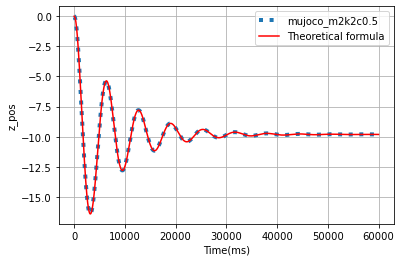

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import mujoco_py

xml_string = """<mujoco>
  <!-- use Runge-Kutta for better energy conservation -->
  <option integrator="RK4" timestep=".001">
    <flag energy="enable"/>
  </option>

  <statistic center="0 0 0"/>

  <worldbody>
    <site name="origin" size=".01" rgba="1 0 0 1"/>
    <light pos="0 0 3"/>

    <!-- <body name="omori" pos="0 0 .06">
      <joint type="slide" axis="0 0 1"/>
      <geom size=".1" mass="1"/>
      <site name="attachment" size=".01" pos="0 0 -.06" rgba="1 0 0 1"/>
    </body> -->
    <body name="omori" pos="0 0 0">
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.1 0.8 0.4 1" mass="2"/>
            <!-- <joint armature="0" damping="0" limited="false" margin="0.01" name="roo2t" pos="0 0 0" type="free"/> -->ダンパの値を莫大にしたら普通に踏むよりも沈むのに時間がかかるのかどうか検証
            <joint name="bane4.991543" pos="0 0 0" axis="0 0 1" type="slide" stiffness= "2" damping="0.5"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                  <site name="attachment" size=".01" pos="0 0 0" rgba="1 0 0 1"/>

        </body>
  </worldbody>

  <!-- <tendon>
    <spatial name="tendon" stiffness="2" springlength="9">
      <site site="origin"/>
      <site site="attachment"/>
    </spatial>
  </tendon> -->

  <sensor>
    <!-- <tendonpos tendon="tendon"/> -->
  </sensor>
</mujoco>"""

# Load the XML model file
model = mujoco_py.load_model_from_xml(xml_string)

# Create the simulator object
sim = mujoco_py.MjSim(model)

# Get the position of the "omori" body
omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]

# Print the position
print("Omori position: ", omori_pos)










# Step the simulation for 100 steps
x = []
y = []
z = []

m = 2
k = 2
c = 0.5

t = np.arange(0, 60, 0.001) # 時間変数
riron1 = np.exp(-(c/(2*m))*t) * (9.81*np.cos(3/8 * np.sqrt(7)*t) + (9.81*2/3*np.sqrt(1/21)) * np.sin(3/8 * np.sqrt(7)*t))-9.81
# riron2 = np.exp(-(c/(2*m))*t) * (9.81*np.cos(0) + (0) * np.sin(3/8 * np.sqrt(7)*t))-9.81
for i in range(60000):
    # Get the position of the "omori" body
    omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]
    x.append(omori_pos[0])
    y.append(omori_pos[1])
    z.append(omori_pos[2])
    sim.step()

# Plot the data
# plt.plot(x,label='x')
# plt.plot(y,label='y')
plt.plot(z, linewidth=4, linestyle="dotted", label='mujoco_m2k2c0.5')
plt.plot(riron1, color='red', label='Theoretical formula')
# plt.ylim(-1.5, 0.5) # y軸の範囲を指定
# plt.xlim(0,10000)
plt.grid()
plt.xlabel('Time(ms)') # x軸のタイトル
plt.ylabel('z_pos') # x軸のタイトル
plt.legend()
plt.show()


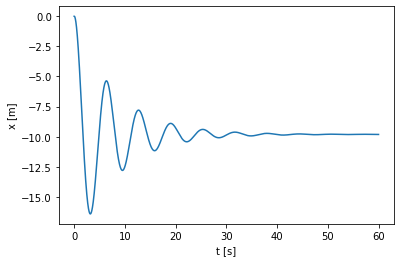

In [39]:
# 1 理論式
import numpy as np
import matplotlib.pyplot as plt
m = 2
k = 2
c = 0.5


t = np.arange(0, 60, 0.002) # 時間変数
y1 = np.exp(-(c/(2*m))*t) * (9.81*np.cos(3/8 * np.sqrt(7)*t) + (9.81*2/3*np.sqrt(1/21)) * np.sin(3/8 * np.sqrt(7)*t))-9.81

plt.plot(t, y1)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.show()

# m2k2c４のグラフと理論式

Omori position:  [0. 0. 0.]


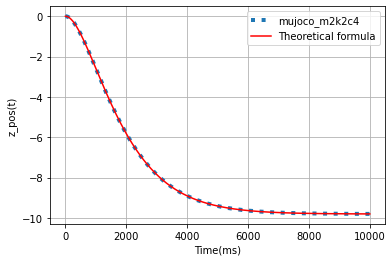

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import mujoco_py

xml_string = """<mujoco>
  <!-- use Runge-Kutta for better energy conservation -->
  <option integrator="RK4" timestep=".001">
    <flag energy="enable"/>
  </option>

  <statistic center="0 0 0"/>

  <worldbody>
    <site name="origin" size=".01" rgba="1 0 0 1"/>
    <light pos="0 0 3"/>

    <!-- <body name="omori" pos="0 0 .06">
      <joint type="slide" axis="0 0 1"/>
      <geom size=".1" mass="1"/>
      <site name="attachment" size=".01" pos="0 0 -.06" rgba="1 0 0 1"/>
    </body> -->
    <body name="omori" pos="0 0 0">
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.1 0.8 0.4 1" mass="2"/>
            <!-- <joint armature="0" damping="0" limited="false" margin="0.01" name="roo2t" pos="0 0 0" type="free"/> -->ダンパの値を莫大にしたら普通に踏むよりも沈むのに時間がかかるのかどうか検証
            <joint name="bane4.991543" pos="0 0 0" axis="0 0 1" type="slide" stiffness= "2" damping="4"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                  <site name="attachment" size=".01" pos="0 0 0" rgba="1 0 0 1"/>

        </body>
  </worldbody>

  <!-- <tendon>
    <spatial name="tendon" stiffness="2" springlength="9">
      <site site="origin"/>
      <site site="attachment"/>
    </spatial>
  </tendon> -->

  <sensor>
    <!-- <tendonpos tendon="tendon"/> -->
  </sensor>
</mujoco>"""

# Load the XML model file
model = mujoco_py.load_model_from_xml(xml_string)

# Create the simulator object
sim = mujoco_py.MjSim(model)

# Get the position of the "omori" body
omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]

# Print the position
print("Omori position: ", omori_pos)










# Step the simulation for 100 steps
x = []
y = []
z = []

m = 2
k = 2
c = 4

t = np.arange(0, 10, 0.001) # 時間変数
riron2 = (9.81+9.81*t)*np.exp(-t) -9.81
for i in range(10000):
    # Get the position of the "omori" body
    omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]
    x.append(omori_pos[0])
    y.append(omori_pos[1])
    z.append(omori_pos[2])
    sim.step()

# Plot the data
# plt.plot(x,label='x')
# plt.plot(y,label='y')
plt.plot(z, linewidth=4, linestyle="dotted", label='mujoco_m2k2c4')
plt.plot(riron2, color='red', label='Theoretical formula')
# plt.ylim(-1.5, 0.5) # y軸の範囲を指定
plt.grid()
plt.xlabel('Time(ms)') # x軸のタイトル
plt.ylabel('z_pos(t)') # x軸のタイトル
plt.legend()
plt.show()


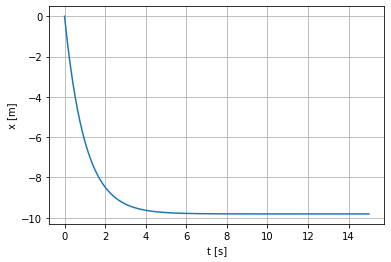

In [44]:
# ２の理論式

m = 2
k = 2
c = 4


t = np.arange(0, 15, 0.002) # 時間変数
y = np.exp(-(c/(2*m))*t) * (9.81*np.cos(0) + (0) * np.sin(3/8 * np.sqrt(7)*t))-9.81

plt.plot(t, y)
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.show()

汎用式作ったが、なぜか少しだけずれることがわかって、おそらく計算上の端数の問題

Omori position:  [0. 0. 0.]


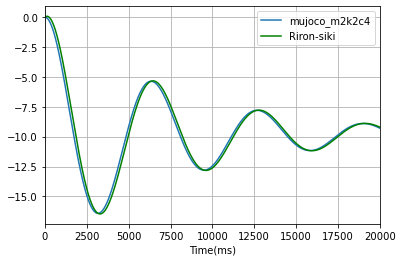

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import mujoco_py

xml_string = """<mujoco>
  <!-- use Runge-Kutta for better energy conservation -->
  <option integrator="RK4" timestep=".001">
    <flag energy="enable"/>
  </option>

  <statistic center="0 0 0"/>

  <worldbody>
    <site name="origin" size=".01" rgba="1 0 0 1"/>
    <light pos="0 0 3"/>

    <!-- <body name="omori" pos="0 0 .06">
      <joint type="slide" axis="0 0 1"/>
      <geom size=".1" mass="1"/>
      <site name="attachment" size=".01" pos="0 0 -.06" rgba="1 0 0 1"/>
    </body> -->
    <body name="omori" pos="0 0 0">
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.1 0.8 0.4 1" mass="2"/>
            <!-- <joint armature="0" damping="0" limited="false" margin="0.01" name="roo2t" pos="0 0 0" type="free"/> -->ダンパの値を莫大にしたら普通に踏むよりも沈むのに時間がかかるのかどうか検証
            <joint name="bane4.991543" pos="0 0 0" axis="0 0 1" type="slide" stiffness= "2" damping="0.5"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                  <site name="attachment" size=".01" pos="0 0 0" rgba="1 0 0 1"/>

        </body>
  </worldbody>

  <!-- <tendon>
    <spatial name="tendon" stiffness="2" springlength="9">
      <site site="origin"/>
      <site site="attachment"/>
    </spatial>
  </tendon> -->

  <sensor>
    <!-- <tendonpos tendon="tendon"/> -->
  </sensor>
</mujoco>"""

# Load the XML model file
model = mujoco_py.load_model_from_xml(xml_string)

# Create the simulator object
sim = mujoco_py.MjSim(model)

# Get the position of the "omori" body
omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]

# Print the position
print("Omori position: ", omori_pos)

###############################################################################################################################################


# Step the simulation for 100 steps
x = []
y = []
z = []

m = 2
k = 2
c = 0.5
w = np.sqrt((np.sqrt(k))/(np.sqrt(m))-np.square(c/(2*m)))
A = 9.81
B = (c/m)*A/w

t = np.arange(0, 60, 0.001) # 時間変数
# riron1 = np.exp(-(c/(2*m))*t) * (9.81*np.cos(3/8 * np.sqrt(7)*t) + (9.81*2/3*np.sqrt(1/21)) * np.sin(3/8 * np.sqrt(7)*t))-9.81
# riron2 = np.exp(-(c/(2*m))*t) * (9.81*np.cos(0) + (0) * np.sin(3/8 * np.sqrt(7)*t))-9.81
y1 = np.exp(-(c/(2*m))*t) * ((A*np.cos(w*t)) + B*np.sin(w*t))-9.81
for i in range(60000):
    # Get the position of the "omori" body
    omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]
    x.append(omori_pos[0])
    y.append(omori_pos[1])
    z.append(omori_pos[2])
    sim.step()

# Plot the data
# plt.plot(x,label='x')
# plt.plot(y,label='y')
plt.plot(z, label='mujoco_m2k2c4')
plt.plot(y1, color='green', label='Riron-siki')
# plt.ylim(-1.5, 0.5) # y軸の範囲を指定
plt.grid()
plt.xlabel('Time(ms)') # x軸のタイトル
plt.legend()
plt.xlim(0,20000)
plt.show()

# plt.plot(t, y)
# plt.xlabel('t [s]')
# plt.ylabel('x [m]')
# plt.show()

上の汎用式なんでずれる？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？

Omori position:  [0. 0. 0.]


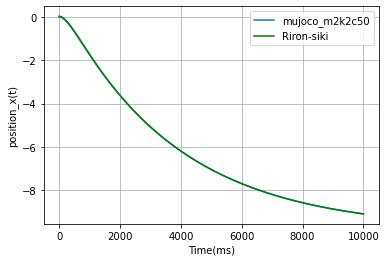

In [6]:
import matplotlib.pyplot as plt

import mujoco_py

xml_string = """<mujoco>
  <!-- use Runge-Kutta for better energy conservation -->
  <option integrator="RK4" timestep=".001">
    <flag energy="enable"/>
  </option>

  <statistic center="0 0 0"/>

  <worldbody>
    <site name="origin" size=".01" rgba="1 0 0 1"/>
    <light pos="0 0 3"/>

    <!-- <body name="omori" pos="0 0 .06">
      <joint type="slide" axis="0 0 1"/>
      <geom size=".1" mass="1"/>
      <site name="attachment" size=".01" pos="0 0 -.06" rgba="1 0 0 1"/>
    </body> -->
    <body name="omori" pos="0 0 0">
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.1 0.8 0.4 1" mass="2"/>
            <!-- <joint armature="0" damping="0" limited="false" margin="0.01" name="roo2t" pos="0 0 0" type="free"/> -->ダンパの値を莫大にしたら普通に踏むよりも沈むのに時間がかかるのかどうか検証
            <joint name="bane4.991543" pos="0 0 0" axis="0 0 1" type="slide" stiffness= "2" damping="8"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                  <site name="attachment" size=".01" pos="0 0 0" rgba="1 0 0 1"/>

        </body>
  </worldbody>

  <!-- <tendon>
    <spatial name="tendon" stiffness="2" springlength="9">
      <site site="origin"/>
      <site site="attachment"/>
    </spatial>
  </tendon> -->

  <sensor>
    <!-- <tendonpos tendon="tendon"/> -->
  </sensor>
</mujoco>"""

# Load the XML model file
model = mujoco_py.load_model_from_xml(xml_string)

# Create the simulator object
sim = mujoco_py.MjSim(model)

# Get the position of the "omori" body
omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]

# Print the position
print("Omori position: ", omori_pos)










# Step the simulation for 100 steps
x = []
y = []
z = []

m = 2
k = 2
c = 8

t = np.arange(0, 10, 0.001) # 時間変数
# riron2 = (9.81+9.81*t)*np.exp(-t) -9.81
riron3 = 10.6*np.exp((-2+np.sqrt(3))*t)-0.759*np.exp((-2-np.sqrt(3))*t)-9.81
for i in range(10000):
    # Get the position of the "omori" body
    omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]
    x.append(omori_pos[0])
    y.append(omori_pos[1])
    z.append(omori_pos[2])
    sim.step()

# Plot the data
# plt.plot(x,label='x')
# plt.plot(y,label='y')
plt.plot(z, label='mujoco_m2k2c50')
plt.plot(riron3, color='green', label='Riron-siki')
# plt.ylim(-1.5, 0.5) # y軸の範囲を指定
plt.grid()
plt.xlabel('Time(ms)') # x軸のタイトル
plt.ylabel('position_x(t)') # x軸のタイトル
plt.legend()
plt.show()



# # まるさんの理論式
# import numpy as np
# import matplotlib.pyplot as plt
# m = 2
# k = 2
# c = 8


# t = np.arange(0, 90, 0.002) # 時間変数
# y = 10.6*np.exp((-2+np.sqrt(3))*t)-0.759*np.exp((-2-np.sqrt(3))*t)-9.81

# plt.plot(t, y)
# plt.xlabel('t [s]')
# plt.ylabel('x [m]')
# plt.show()

In [ ]:
# 過制動、過減衰の汎用式
import numpy as np
import matplotlib.pyplot as plt
import mujoco_py

xml_string = """<mujoco>
  <!-- use Runge-Kutta for better energy conservation -->
  <option integrator="RK4" timestep=".001">
    <flag energy="enable"/>
  </option>

  <statistic center="0 0 0"/>

  <worldbody>
    <site name="origin" size=".01" rgba="1 0 0 1"/>
    <light pos="0 0 3"/>

    <!-- <body name="omori" pos="0 0 .06">
      <joint type="slide" axis="0 0 1"/>
      <geom size=".1" mass="1"/>
      <site name="attachment" size=".01" pos="0 0 -.06" rgba="1 0 0 1"/>
    </body> -->
    <body name="omori" pos="0 0 0">
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.1 0.8 0.4 1" mass="2"/>
            <!-- <joint armature="0" damping="0" limited="false" margin="0.01" name="roo2t" pos="0 0 0" type="free"/> -->ダンパの値を莫大にしたら普通に踏むよりも沈むのに時間がかかるのかどうか検証
            <joint name="bane4.991543" pos="0 0 0" axis="0 0 1" type="slide" stiffness= "2" damping="8"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                  <site name="attachment" size=".01" pos="0 0 0" rgba="1 0 0 1"/>

        </body>
  </worldbody>

  <!-- <tendon>
    <spatial name="tendon" stiffness="2" springlength="9">
      <site site="origin"/>
      <site site="attachment"/>
    </spatial>
  </tendon> -->

  <sensor>
    <!-- <tendonpos tendon="tendon"/> -->
  </sensor>
</mujoco>"""

# Load the XML model file
model = mujoco_py.load_model_from_xml(xml_string)

# Create the simulator object
sim = mujoco_py.MjSim(model)

# Get the position of the "omori" body
omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]

# Print the position
print("Omori position: ", omori_pos)

###############################################################################################################################################


# Step the simulation for 100 steps
x = []
y = []
z = []

m = 2
k = 2
c = 8
w = np.sqrt((np.sqrt(k))/(np.sqrt(m))-np.square(c/(2*m)))
A = 
B = (c/m)*A/w

t = np.arange(0, 60, 0.001) # 時間変数
# riron1 = np.exp(-(c/(2*m))*t) * (9.81*np.cos(3/8 * np.sqrt(7)*t) + (9.81*2/3*np.sqrt(1/21)) * np.sin(3/8 * np.sqrt(7)*t))-9.81
# riron2 = np.exp(-(c/(2*m))*t) * (9.81*np.cos(0) + (0) * np.sin(3/8 * np.sqrt(7)*t))-9.81
y1 = np.exp(-(c/(2*m))*t) * ((A*np.cos(w*t)) + B*np.sin(w*t))-9.81
for i in range(60000):
    # Get the position of the "omori" body
    omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]
    x.append(omori_pos[0])
    y.append(omori_pos[1])
    z.append(omori_pos[2])
    sim.step()

# Plot the data
# plt.plot(x,label='x')
# plt.plot(y,label='y')
plt.plot(z, label='mujoco_m2k2c4')
plt.plot(y1, color='green', label='Riron-siki')
# plt.ylim(-1.5, 0.5) # y軸の範囲を指定
plt.grid()
plt.xlabel('Time(ms)') # x軸のタイトル
plt.legend()
plt.xlim(0,20000)
plt.show()

# plt.plot(t, y)
# plt.xlabel('t [s]')
# plt.ylabel('x [m]')
# plt.show()

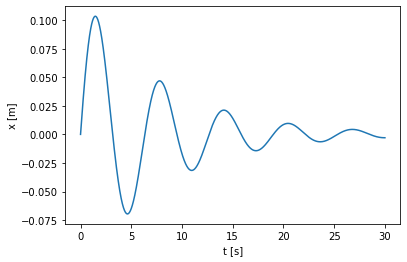

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# 解析解
def x(t, A, B):
    return np.exp(-0.5 * t) * (A * np.cos(np.sqrt(3) * t) + B * np.sin(np.sqrt(3) * t))
    np.exp(-0.125*t) * (1 + 0.125 * np.sin(3/8 * np.sqrt(7)*t))

A = 0 # 初期位置
B = 0 # 初期速度

t = np.arange(0, 30, 0.002) # 時間変数
y1 = np.exp(-0.125*t) * (0 + 0.125 * np.sin(3/8 * np.sqrt(7)*t))

plt.plot(t, y1)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.show()


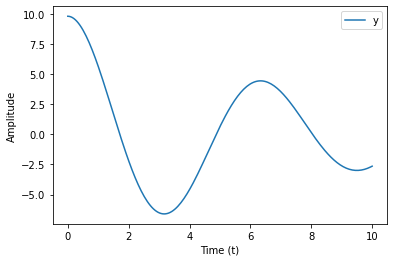

In [7]:
from scipy.integrate import odeint
import numpy as np
import cmath

def damped_oscillation(y, t, omega, beta):
    return [y[1], -omega**2*y[0] - beta*y[1]]

m = 2
k = 2
c = 0.5
# ganma = c/(2*np.sqrt(m*k))
beta = c/m
# omega = np.sqrt(k/m) * np.sqrt(1-ganma*ganma)
omega = np.sqrt(k/m)
# beta = np.sqrt(ganma*ganma-1)

# omega = 2
# beta = 0.25
t = np.linspace(0, 10, 200)
y0 = [9.81, 0]
sol = odeint(damped_oscillation, y0, t, args=(omega, beta))

import matplotlib.pyplot as plt

plt.plot(t, sol[:, 0], label="y")
# plt.plot(t, sol[:, 1], label="dy/dt")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


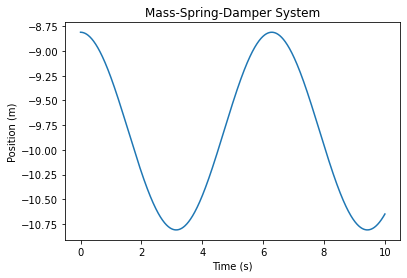

In [13]:
import numpy as np
import matplotlib.pyplot as plt

m = 2
k = 2
c = 8
w = np.sqrt(k/m)

def pos(t, x0, v0):
    return -9.81 + x0*np.cos(w*t) + (v0/w)*np.sin(w*t)


t = np.linspace(0, 10, num=1000)
x = pos(t, 1, 0)

plt.plot(t, x)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Mass-Spring-Damper System")
plt.show()


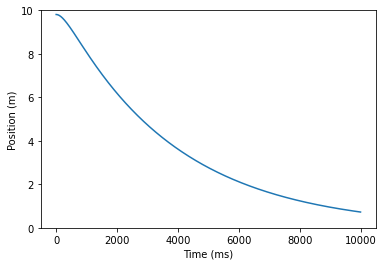

In [15]:





import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def damped_oscillation(t, y, c, k, m):
    x, x_dot = y
    return [x_dot, -(c/m) * x_dot - (k/m) * x]

c = 8
k = 2
m = 2.0
y0 = [9.81, 0.0]
t = np.linspace(0, 10000, num=1000) *0.001

sol = solve_ivp(fun=lambda t, y: damped_oscillation(t, y, c, k, m), t_span=[t[0], t[-1]], y0=y0, t_eval=t)

plt.plot(sol.t*1000, sol.y[0, :])
plt.xlabel('Time (ms)')
plt.ylabel('Position (m)')
plt.ylim(0,10)
plt.show()


### 汎用式！！

Omori position:  [0. 0. 0.]


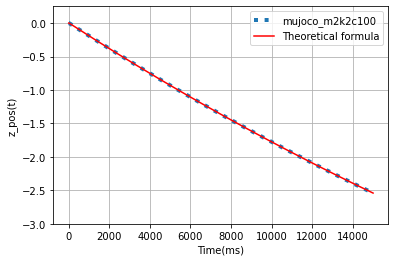

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import mujoco_py

xml_string = """<mujoco>
  <!-- use Runge-Kutta for better energy conservation -->
  <option integrator="RK4" timestep=".001">
    <flag energy="enable"/>
  </option>

  <statistic center="0 0 0"/>

  <worldbody>
    <site name="origin" size=".01" rgba="1 0 0 1"/>
    <light pos="0 0 3"/>

    <!-- <body name="omori" pos="0 0 .06">
      <joint type="slide" axis="0 0 1"/>
      <geom size=".1" mass="1"/>
      <site name="attachment" size=".01" pos="0 0 -.06" rgba="1 0 0 1"/>
    </body> -->
    <body name="omori" pos="0 0 0">
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.1 0.8 0.4 1" mass="2"/>
            <!-- <joint armature="0" damping="0" limited="false" margin="0.01" name="roo2t" pos="0 0 0" type="free"/> -->ダンパの値を莫大にしたら普通に踏むよりも沈むのに時間がかかるのかどうか検証
            <joint name="bane4.991543" pos="0 0 0" axis="0 0 1" type="slide" stiffness= "2" damping="100"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                  <site name="attachment" size=".01" pos="0 0 0" rgba="1 0 0 1"/>

        </body>
  </worldbody>

  <!-- <tendon>
    <spatial name="tendon" stiffness="2" springlength="9">
      <site site="origin"/>
      <site site="attachment"/>
    </spatial>
  </tendon> -->

  <sensor>
    <!-- <tendonpos tendon="tendon"/> -->
  </sensor>
</mujoco>"""

# Load the XML model file
model = mujoco_py.load_model_from_xml(xml_string)

# Create the simulator object
sim = mujoco_py.MjSim(model)

# Get the position of the "omori" body
omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]

# Print the position
print("Omori position: ", omori_pos)










# Step the simulation for 100 steps
x = []
y = []
z = []
# tile1 = []
# tile2 = []
# tile3 = []
# tile4 = []


t = np.arange(0, 10, 0.001) # 時間変数
# riron2 = (9.81+9.81*t)*np.exp(-t) -9.81
# riron3 = 10.6*np.exp((-2+np.sqrt(3))*t)-0.759*np.exp((-2-np.sqrt(3))*t)-9.81
for i in range(15000):
    # Get the position of the "omori" body
    omori1_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]
    # omori1_pos = sim.data.body_xpos[sim.model.body_name2id("tile1")]
    # omori2_pos = sim.data.body_xpos[sim.model.body_name2id("tile2")]
    # omori3_pos = sim.data.body_xpos[sim.model.body_name2id("tile3")]
    # omori4_pos = sim.data.body_xpos[sim.model.body_name2id("tile4")]
    # x.append(omori_pos[0])
    # y.append(omori_pos[1])
    z.append(omori_pos[2])
    sim.step()





import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def damped_oscillation(t, y, c, k, m):
    x, x_dot = y
    return [x_dot, -(c/m) * x_dot - (k/m) * x]

c = 100
k = 2
m = 2.0
y0 = [9.81, 0.0]
t = np.linspace(0, 15000, num=1000) *0.001

sol = solve_ivp(fun=lambda t, y: damped_oscillation(t, y, c, k, m), t_span=[t[0], t[-1]], y0=y0, t_eval=t)

# plt.plot(sol.t*1000, sol.y[0, :]-9.81, label='Riron-siki')
# plt.ylim(0,10)















# Plot the data
# plt.plot(x,label='x')
# plt.plot(y,label='y')
plt.plot(z, linewidth=4, linestyle="dotted", label='mujoco_m2k2c100')
plt.plot(sol.t*1000, sol.y[0, :]-9.81, color='red', label='Theoretical formula' )
# plt.plot(riron3, color='green', label='Riron-siki')
plt.ylim(-3, 0.25) # y軸の範囲を指定
plt.grid()
plt.xlabel('Time(ms)') # x軸のタイトル
plt.ylabel('z_pos(t)') # x軸のタイトル
plt.legend()
plt.show()


Omori position:  [0. 0. 0.]


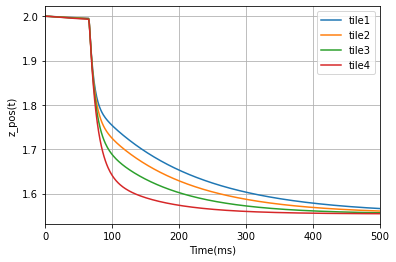

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import mujoco_py

xml_string = """
<mujoco model="real_sim_test_labo">
  <compiler angle="degree"/>
    <option integrator="RK4" timestep="0.01"/>
    <size nconmax="10000" njmax="10000" nstack="10000000"/>
  <asset>
    <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100"/>
    <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom" random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127"/>
    <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8" type="2d" width="100"/>
    <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60" texture="texplane"/>
    <material name="geom" texture="texgeom" texuniform="true"/>
  </asset>
  <worldbody>
  <geom conaffinity="1" condim="3" material="MatPlane" name="floor" pos="0 0 0" rgba="0.8 0.9 0.8 1" size="40 40 40" type="plane"/>
    <light cutoff="100" diffuse="1 1 1" dir="-0 0 -1.3" directional="true" exponent="1" pos="0 0 1.3" specular=".1 .1 .1"/>

    <site name="origin" size=".01" rgba="1 0 0 1"/>
    <light pos="0 0 3"/>

    <body name="core" pos="0 0 0.15" >
            <joint name="root2" damping="0" armature="0" pos="0 0 0" limited="false" type="free"/>
            
            <geom name="core_geom" type="box" pos="0 0 0" quat="1 0 0 0" size=".04 .04 .02" rgba=".8 .2 0 1" mass=".1"/>

            <geom name="arm_front0" type="box" pos=".08 0 0" size=".04 .005 .005" quat="1 0 0 0" rgba=".8 .8 .8 1" mass=".02"/>
            <geom name="arm_back0" type="box" pos="-.08 0 0" size=".04 .005 .005" quat="0 0 0 1" rgba=".8 .8 .8 1" mass=".02"/>
            <geom name="arm_left0" type="box" pos="0 .08 0" size=".04 .005 .005" quat=".707 0 0 .707" rgba=".8 .8 .8 1" mass=".02"/>
            <geom name="arm_right0" type="box" pos="0 -.08 0" size=".04 .005 .005" quat=".707 0 0 -.707" rgba=".8 .8 .8 1" mass=".02"/>

            <body name="arm_front1" pos=".12 0 0">
                <geom type="box" pos=".01 0 .005" size=".01 .005 .01" quat="1 0 0 0" rgba="1 .1 0 1" mass=".02"/>
                <joint name="tilt_front" type="hinge" damping="0" armature="0.01" pos="0 0 0" axis="1 0 0" limited="true" range="-60 60"/>
                <body name="thruster0" pos="0.01 0 0.015">
                    <geom type="cylinder" pos="0 0 .0025" size=".05 .0025" quat="1 0 0 0" rgba=".3 1 .3 0.3" mass=".005"/>
                    <site name="motor_front" type="cylinder" pos="0 0 .0025" size=".01 .0025" quat="1 0 0 0" rgba=".3 .8 .3 1"/>
                </body>
            </body>

            <body name="arm_back1" pos="-.12 0 0">
                <geom type="box" pos="-.01 0 .005" size=".01 .005 .01" quat="0 0 0 1" rgba="1 .1 0 1" mass=".02"/>
                <joint name="tilt_back" type="hinge" damping="0" armature="0.01" pos="0 0 0" axis="1 0 0" limited="true" range="-60 60"/>
                <body name="thruster1" pos="-0.01 0 .015">
                    <geom type="cylinder" pos="0 0 .0025" size=".05 .0025" quat="1 0 0 0" rgba=".3 1 .3 0.3" mass=".005"/>
                    <site name="motor_back" type="cylinder" pos="0 0 .0025" size=".01 .0025" quat="1 0 0 0" rgba=".3 .8 .3 1"/>
                </body>
            </body>

            <body name="arm_left1" pos="0 .12 0">
                <geom type="box" pos="0 .01 .005" size=".01 .005 .01" quat=".7071068 0 0 .7071068" rgba="1 .1 0 1" mass=".02"/>
                <joint name="tilt_left" type="hinge" damping="0" armature="0.01" pos="0 0 0" axis="0 1 0" limited="true" range="-60 60"/>
                <body name="thruster2" pos="0 0.01 0.015">
                    <geom type="cylinder" pos="0 0 .0025" size=".05 .0025" quat="1 0 0 0" rgba=".3 1 .3 0.3" mass=".005"/>
                    <site name="motor_left" type="cylinder" pos="0 0 .0025" size=".01 0.0025" quat="1 0 0 0" rgba=".3 .8 .3 1"/>
                </body>
            </body>

            <body name="arm_right1" pos="0 -.12 0">
                <geom type="box" pos="0 -.01 .005" size=".01 .005 .01" quat=".7071068 0 0 -.7071068" rgba="1 .1 0 1" mass=".02"/>
                <joint name="tilt_right" type="hinge" damping="0" armature="0.01" pos="0 0 0" axis="0 1 0" limited="true" range="-60 60"/>
                <body name="thruster3" pos="0 -0.01 .015">
                    <geom type="cylinder" pos="0 0 .0025" size=".05 .0025" quat="1 0 0 0" rgba=".5 .1 .5 0.4" mass=".005"/>
                    <site name="motor_right" type="cylinder" pos="0 0 .0025" size=".01 .0025" quat="1 0 0 0" rgba=".9 .8 .1 1"/>
                </body>
            </body>
            </body>





    <body pos="1 0.6 3">
      <joint type="slide" axis="0 1 0"/>
      <!-- damping="1" -->

      <geom size=".05" mass="102"/>
      <site name="attachment" size=".01" pos="0 0 -.06" rgba="1 0 0 1"/>
    </body>




























        
                  //massを大きくしたらダンパの問題は解消されたけど、最初出現してからバネの釣り合いの位置に行くまで４秒くらいかかってしまう。
                    足場をすぐに釣り合いの位置に移動させる方法を、massを軽くすることで再現していたためすぐに釣り合いの位置に戻ってくれていたがそれをするとダンパの値を大きく
                    するとエラーになってしまう。最初に４秒くらいロボットをストップさせてから学習する？？しかしそれでは、学習が変になってしまう（最初止まることを覚えてしまう？）
                    むずかしい　springrefでうまく調整できるのか？？ダンパはできた。しかし釣り合いの位置にバネが移動するまでに時間がかかってしまう。
                    springrefをつかったらできた！！！！！！！！！！！！

        <body name="tile1" pos="0.5 0 2">
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.544 0.8 1 1" mass="100.102"/>
            <!-- <joint armature="0" damping="0" limited="false" margin="0.01" name="roo2t" pos="0 0 0" type="free"/> -->ダンパの値を莫大にしたら普通に踏むよりも沈むのに時間がかかるのかどうか検証
            <joint name="bane4.3" pos="0 0 3" axis="0 0 1" type="slide" damping= "2400" springref= "0.6" stiffness= "1600"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
        </body>
        
        <body name="tile2" pos="0.71 0 2">
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.544 0.8 1 1" mass="100.102"/>
            <!-- <joint armature="0" damping="0" limited="false" margin="0.01" name="roo2t" pos="0 0 0" type="free"/> -->ダンパの値を莫大にしたら普通に踏むよりも沈むのに時間がかかるのかどうか検証
            <joint name="bane4.991543" pos="0 0 3" axis="0 0 1" type="slide" damping= "2100" springref= "0.6" stiffness= "1600"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
        </body>

        <body name="tile3" pos="0.92 0 2">
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.544 0.8 1 1" mass="100.102"/>
            <!-- <joint armature="0" damping="0"limited="false" margin="0.01" name="roo2t" pos="0 0 0" type="free"/> -->
            <joint name="bane4.954508" pos="0 0 3" axis="0 0 1" type="slide" damping= "1800" springref= "0.6" stiffness= "1600"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
        </body>
        <body name="tile4" pos="1.13 0 2">
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.544 0.8 1 1" mass="100.102"/>
            <!-- <joint armature="0" damping="0"limited="false" margin="0.01" name="roo2t" pos="0 0 0" type="free"/> -->
            <joint name="bane4.90866558" pos="0 0 3" axis="0 0 1" type="slide" damping= "1500" springref= "0.6" stiffness= "1600"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
        </body>







        <body name="m1" pos="0.5 0 4.3">
            <freejoint/>
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.9 0.2 1 1" mass="70.502"/>
        </body>

        <body name="m2" pos="0.71 0 4.3">
            <freejoint/>
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.9 0.2 1 1" mass="70.502"/>
        </body>

        <body name="m3" pos="0.92 0 4.3">
            <freejoint/>
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.9 0.2 1 1" mass="70.502"/>
        </body>

        <body name="m4" pos="1.13 0 4.3">
            <freejoint/>
            <geom friction="0.13 0 0" pos="0 0 0" size="0.1 0.1 0.1" type="box" rgba="0.9 0.2 1 1" mass="70.502"/>
        </body>

            <site name="x_axis" type="box" fromto=".0 .0 .0 9 0 0" size="0.015" rgba="1 0 0 1"/>
            <site name="y_axis" type="box" fromto=".0 .0 .0 0 9 0" size="0.015" rgba="0 1 0 1"/>
            <site name="z_axis" type="box" fromto=".0 .0 .0 0 0 9" size="0.015" rgba="0 0 1 1"/>
            
         </worldbody>



 <tendon>
    <spatial name="tendon" stiffness="50" springlength=".5">
      <site site="origin"/>
      <site site="attachment"/>
    </spatial>
  </tendon>

  <sensor>
    <tendonpos tendon="tendon"/>
  </sensor>

   <actuator>

        <motor ctrllimited="true" ctrlrange="0. 6." gear="0  0. 1. 0. 0. -0.1" site="motor_front"/>
        <motor ctrllimited="true" ctrlrange="0. 6." gear="0  0. 1. 0. 0. -0.1" site="motor_left"/>
        <motor ctrllimited="true" ctrlrange="0. 6." gear="0  0. 1. 0. 0.  0.1" site="motor_back"/>
        <motor ctrllimited="true" ctrlrange="0. 6." gear="0  0. 1. 0. 0.  0.1" site="motor_right"/>

        <velocity ctrllimited="true" ctrlrange="-1. 1." gear="0.3" joint="tilt_front"/>
        <velocity ctrllimited="true" ctrlrange="-1. 1." gear="0.3" joint="tilt_left"/>
        <velocity ctrllimited="true" ctrlrange="-1. 1." gear="0.3" joint="tilt_back"/>
        <velocity ctrllimited="true" ctrlrange="-1. 1." gear="0.3" joint="tilt_right"/>
  </actuator>
</mujoco>"""

# Load the XML model file
model = mujoco_py.load_model_from_xml(xml_string)

# Create the simulator object
sim = mujoco_py.MjSim(model)

# Get the position of the "omori" body
omori1_pos = sim.data.body_xpos[sim.model.body_name2id("tile1")]
omori2_pos = sim.data.body_xpos[sim.model.body_name2id("tile2")]
omori3_pos = sim.data.body_xpos[sim.model.body_name2id("tile3")]
omori4_pos = sim.data.body_xpos[sim.model.body_name2id("tile4")]

# Print the position
print("Omori position: ", omori_pos)










# Step the simulation for 100 steps
x = []
y = []
z = []
tile1 = []
tile2 = []
tile3 = []
tile4 = []


t = np.arange(0, 10, 0.001) # 時間変数
# riron2 = (9.81+9.81*t)*np.exp(-t) -9.81
# riron3 = 10.6*np.exp((-2+np.sqrt(3))*t)-0.759*np.exp((-2-np.sqrt(3))*t)-9.81
for i in range(1000):
    # Get the position of the "omori" body
    omori1_pos = sim.data.body_xpos[sim.model.body_name2id("tile1")]
    omori2_pos = sim.data.body_xpos[sim.model.body_name2id("tile2")]
    omori3_pos = sim.data.body_xpos[sim.model.body_name2id("tile3")]
    omori4_pos = sim.data.body_xpos[sim.model.body_name2id("tile4")]
    # x.append(omori_pos[0])
    # y.append(omori_pos[1])
    tile1.append(omori1_pos[2])
    tile2.append(omori2_pos[2])
    tile3.append(omori3_pos[2])
    tile4.append(omori4_pos[2])
    sim.step()





import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def damped_oscillation(t, y, c, k, m):
    x, x_dot = y
    return [x_dot, -(c/m) * x_dot - (k/m) * x]

c = 8
k = 2
m = 2.0
y0 = [9.81, 0.0]
t = np.linspace(0, 40000, num=1000) *0.001

sol = solve_ivp(fun=lambda t, y: damped_oscillation(t, y, c, k, m), t_span=[t[0], t[-1]], y0=y0, t_eval=t)

# plt.plot(sol.t*1000, sol.y[0, :]-9.81, label='Riron-siki')
# plt.ylim(0,10)








tile1.remove(0)
tile2.remove(0)# 0番めの変な値消し！！！！！
tile3.remove(0)
tile4.remove(0)






# Plot the data
# plt.plot(x,label='x')
# plt.plot(y,label='y')
plt.plot(tile1, label='tile1')
plt.plot(tile2, label='tile2')
plt.plot(tile3, label='tile3')
plt.plot(tile4, label='tile4')
# plt.plot(sol.t*1000, sol.y[0, :]-9.81, color='red', label='Theoretical formula' )
# plt.plot(riron3, color='green', label='Riron-siki')
plt.xlim(0, 500) # y軸の範囲を指定
# plt.ylim(1.5, 2.0) # y軸の範囲を指定
plt.grid()
plt.xlabel('Time(ms)') # x軸のタイトル
plt.ylabel('z_pos(t)') # x軸のタイトル
plt.legend()
plt.show()


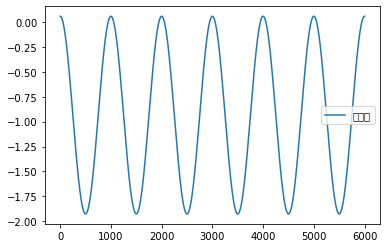

In [49]:
import matplotlib.pyplot as plt

# Step the simulation for 100 steps
x1_20 = []
y1_20 = []

z4_10 = []
z1_98696 = []
for i in range(6000):
    # Get the position of the "omori" body
    omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]
    x1_10.append(omori_pos[0])
    z1_98696.append(omori_pos[2])
    # z1_10.append(omori_pos[2])
    sim.step()

# Plot the data（1_10は、周期２のデータ）
# plt.plot(z1_10,label='m1_stf10')
plt.plot(z1_98696,label='theory T=2')
# plt.plot(z1_30,label='m1_stf30')
# plt.plot(z1_40,label='m1_stf40')
# plt.plot(z1_10,label='z')
plt.legend()
plt.show()


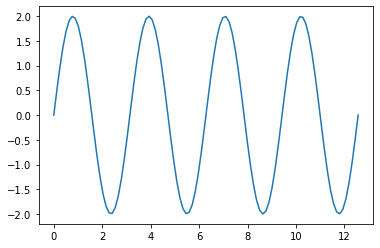

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# x軸の値
x = np.linspace(0, 4 * np.pi, 100)

# y軸の値 (周期 2, 大きさ 2 の波形)
y = 2 * np.sin(2 * x)

# グラフの描画
plt.plot(x, y)
plt.show()

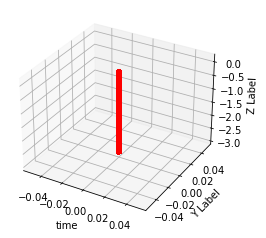

In [10]:
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
# ax.set_xlim(-0.35, -0.345)
# ax.set_ylim(-1, 0)
# ax.set_zlim(0.441, 0.443)
ax.set_xlabel('time')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [48]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y, 'z':z})
df.to_csv('omori_positions.csv')


ValueError: All arrays must be of the same length

In [54]:
x = []
y = []
z = []
while len(x)<1000:
    # Get the position of the "omori" body
    omori_pos = sim.data.body_xpos[sim.model.body_name2id("omori")]
    x.append(omori_pos[0])
    y.append(omori_pos[1])
    z.append(omori_pos[2])
    sim.step()

df = pd.DataFrame({'x': x[:1000], 'y': y[:1000], 'z':z[:1000]})
df.to_csv('omori_positions0.1.csv')


In [ ]:
viewer = mujoco_py.MjViewer(sim)
viewer.render()

# 地形リセットプログラムいつでも実行できるセル

### 安定版

In [6]:
import random
#high1 = random.randint(2, 9)
numX = 1
numY = 1
number = random.uniform(2, 10)
damping = random.randint(30,100) #バネの、、、ダンピング
springref = random.uniform(0.1,2)   #バネの伸び具合
stiffness = random.randint(200,1000)  #バネの硬さ
friction = random.uniform(0.05,0.3)
print("高さは一定を作ります")
print("摩擦ランダム範囲は"+ str(friction) +"です")
print("")


f = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'w')

f.write('''
<mujoco model="quadrupedxfire">
    <compiler angle="degree" meshdir="../meshes_mujoco/"/>
    <!-- <option integrator="RK4" timestep="0.01"/> -->
    <option integrator="RK4" timestep="0.01"/>

    <size njmax="5000" nconmax="100000"/>
    <custom>
    <numeric data="0.0 0.0 0.55 1.0 0.0 0.0 0.0 0.0 1.0 0.0 -1.0 0.0 -1.0 0.0 1.0" name="init_qpos"/>
    </custom>
    <!-- スポンジは貫通するのでやめておきました。板バネで、貫通しない、かつ弾力の有る足場を作っていきたいと思います -->
    <default/>
    <asset>
    <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100"/>
    <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom" random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127"/>
    <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8" type="2d" width="100"/>
    <material name="MatPlane" reflectance="0" shininess="0.4" specular="1" texrepeat="60 60"/>
    <!-- <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60" texture="texplane"/> -->
    <material name="geom" texture="texgeom" texuniform="true"/>
    </asset>
    <worldbody>
    <geom conaffinity="1" condim="3" material="MatPlane" name="floor" pos="0 0 0" rgba="0.4 0.4 0.4 1" size="40 40 40" type="plane"/>
    <light cutoff="100" diffuse="1 1 1" dir="-0 0 -1.3" directional="true" exponent="1" pos="0 0 1.3" specular=".1 .1 .1"/>
    <body name="torso" pos="0.71 1.156 1.4">
    <geom size="0.11 0.05 0.02" type="box" contype="0"  group="1" rgba="0 0 1 0.9" friction="0.1 0 0"/>
    <geom size="0.11 0.05 0.02" type="box" rgba="0 0 1 0.2" friction="0.1 0 0"/>
    <joint armature="0" damping="0" limited="false" margin="0.01" name="root" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
    <body name="leg_11" pos="0.11 0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_11" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="2 1 0 0.8" friction="0.1 0 0"/>

        <body name="leg_12" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 0 0 0.8" friction="0.1 0 0"/>

        <body name="leg_13" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-170.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_21" pos="-0.11 0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_21" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8" friction="0.1 0 0"/>

        <body name="leg_22" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8" friction="0.1 0 0"/>

        <body name="leg_23" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-170.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_31" pos="-0.11 -0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_31" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>

        <body name="leg_32" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
        <body name="leg_33" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 170.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_41" pos="0.11 -0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_41" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>
        <body name="leg_42" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
        <body name="leg_43" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239"  damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 170.71239"  damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>
    </body>

''')
f.close()

fx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')


for numY in range(12):
    number = number + 1
    for numX in range(40):
        number = number+1
        #high1 = random.randint(2, 9)
        number = random.uniform(2, 10)
###############################################設定ゾーン###############################
        damping = random.randint(70,100) #バネの、、、ダンピング
        springref = 0#random.uniform(0.1,2)   #バネの伸び具合
        stiffness = random.randint(200,1000)  #バネの硬さ
        friction = random.uniform(1.0,1.01)
###################################設定ゾーン########################################
        fx.write(f'''
        <body name="itabane{numX},{numY}" pos="{0.11+0.086*numX} {0.726+0.086*numY} 1">
                        <!-- <geom size="0.04 0.04 0.02" type="box" contype="0"  group="1" rgba="{(damping-30)/70} {friction*2} {stiffness/1000} 1" friction="{friction} 0 0"/> -->//massをgeomに書いてもinertialに書いても同じなんだ！！！！！！
                        <geom size="0.04 0.04 0.035" type="box" contype="0"  group="1" rgba="{stiffness/1000} 0.8 1 1" friction="{friction} 0 0"/>
                        <inertial pos="0 0 0" mass="0.4" diaginertia="5.36165e-09 5.36165e-09 5.36165e-10" />
                        <joint name="bane{numY+number}" pos="0 0 3" axis="0 0 1" type="slide" damping= "{damping}" springref= "{springref}" stiffness= "{stiffness}"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                        
                        </body>

                    '''
        )


        # fx.write(f'''
        # <body name="itabane{numX},{numY}" pos="{0.11+0.4*numX} {0.726+0.2*numY} 0.3">
        #                 <geom size="0.1948 0.098 0.12" type="box" contype="0"  group="1" rgba="0.6 2 1 1" friction="0.1 1"/>
        #                 <!-- <geom size="0.31 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
        #                 <joint name="bane{numY+number}" pos="0 0 1" axis="0 0 1" type="slide" damping= "80" springref= "1" stiffness= "800"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
        #                 <body name="itabane{number*10},{numX},{numY}" pos="0 0 0.5">
        #                 <geom size="0.1948 0.098 0.12" type="box" group="1" rgba="6 2 1 1" friction="0.1 1"/>
        #                 <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        #                 <!-- <geom size="0.11 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
        #                 <!-- <joint armature="0" damping="080limited="false" margin="0.01" name="bane2" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！ -->
        #                 <!-- <joint name="bane2" pos="0 0 0" axis="0 0 1" limited="false" damping="080" range="-30.5708 3.5708" frictionloss="0.85" springref= "0.02" stiffness= "8000"/> -->
        #                 </body>
        #                 </body>

        #             '''
        # )

fx.close()

fxx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')
fxx.write(
'''  </worldbody>
    <actuator>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_11" gear="10"/>//ctrlrangeはおそらくモーターの力強さをあらわしているぽい やはりそうだ！！！
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_12" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_13" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_21" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_22" gear="10"/>//トルクを０にしようとしたらVarue errorになってしまった。紐のモデルを調べて、動力のない関節を作れないか見てみます
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_23" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_31" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_32" gear="10"/>//そのまえに、トルクの値がどれくらい小さくできるのかを検証してみます
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_33" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_41" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_42" gear="10"/>ジョイントのまわりにくさは、gearか？？←ちがうぽい　jointタグのfrictionlossか？？←これだ！←これだけではないぽい　
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_43" gear="10"/>
    </actuator>
</mujoco>''')

fxx.close()

print("出力しました")



高さは一定を作ります
摩擦ランダム範囲は0.058765138607196774です

出力しました


### いろいろいじって実験するならこっち

In [3]:

import random
#high1 = random.randint(2, 9)
tnumX = 1
tnumY = 1
bnumX = 1
bnumY = 1
number = random.uniform(2, 10)
damping = random.randint(30,100) #バネの、、、ダンピング
springref = random.uniform(0.1,2)   #バネの伸び具合
stiffness = random.randint(200,1000)  #バネの硬さ
friction = random.uniform(0.05,0.3)
print("start_creating_randamfield")
print("摩擦ランダム範囲は"+ str(friction) +"です")
print("")


f = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'w')

f.write('''
<mujoco model="quadrupedxfire">
    <compiler angle="degree" meshdir="../meshes_mujoco/"/>
    <!-- <option integrator="RK4" timestep="0.01"/> -->
    <option integrator="RK4" timestep="0.01"/>

    <size njmax="5000" nconmax="100000"/>
    <custom>
    <numeric data="0.0 0.0 0.55 1.0 0.0 0.0 0.0 0.0 1.0 0.0 -1.0 0.0 -1.0 0.0 1.0" name="init_qpos"/>
    </custom>
    <!-- スポンジは貫通するのでやめておきました。板バネで、貫通しない、かつ弾力の有る足場を作っていきたいと思います -->
    <default/>
    <asset>
    <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100"/>
    <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom" random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127"/>
    <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8" type="2d" width="100"/>
    <material name="MatPlane" reflectance="0" shininess="0.4" specular="1" texrepeat="60 60"/>
    <!-- <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60" texture="texplane"/> -->
    <material name="geom" texture="texgeom" texuniform="true"/>
    </asset>
    <worldbody>
    <geom conaffinity="1" condim="3" material="MatPlane" name="floor" pos="0 0 0" rgba="0.4 0.4 0.4 1" size="40 40 40" type="plane"/>
    <light cutoff="100" diffuse="1 1 1" dir="-0 0 -1.3" directional="true" exponent="1" pos="0 0 1.3" specular=".1 .1 .1"/>
    <body name="torso" pos="0.71 1.156 1.4">
    <geom size="0.11 0.05 0.02" type="box" contype="0"  group="1" rgba="0 0 1 0.9" friction="0.1 0 0"/>
    <geom size="0.11 0.05 0.02" type="box" rgba="0 0 1 0.2" friction="0.1 0 0"/>
    <joint armature="0" damping="0" limited="false" margin="0.01" name="root" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
    <body name="leg_11" pos="0.11 0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_11" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="2 1 0 0.8" friction="0.1 0 0"/>

        <body name="leg_12" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 0 0 0.8" friction="0.1 0 0"/>

        <body name="leg_13" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-170.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_21" pos="-0.11 0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_21" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8" friction="0.1 0 0"/>

        <body name="leg_22" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8" friction="0.1 0 0"/>

        <body name="leg_23" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-170.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_31" pos="-0.11 -0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_31" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>

        <body name="leg_32" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
        <body name="leg_33" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 170.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_41" pos="0.11 -0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_41" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>
        <body name="leg_42" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
        <body name="leg_43" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239"  damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 170.71239"  damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>
    </body>

''')
f.close()

fx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')


for tnumY in range(12):
    number = number + 1
    for tnumX in range(40):
        number = number+1
        #high1 = random.randint(2, 9)
        number = random.uniform(2, 10)
###############################################設定ゾーン###############################
        damping = random.randint(70,100) #バネの、、、ダンピング
        springref = 0#random.uniform(0.1,2)   #バネの伸び具合
        stiffness = random.randint(200,1000)  #バネの硬さ
        friction = random.uniform(1.0,1.01)
###################################設定ゾーン########################################
###############################################設定２ゾーン###############################
        # damping = random.randint(100,1500) #バネの、、、ダンピング
        # springref = -0.06 #random.uniform(0.1,2)   #バネの伸び具合
        # stiffness = 2000 #random.randint(1000,2000)  #バネの硬さ
        # friction = random.uniform(0.3,1.00)
###################################設定２ゾーン########################################
        fx.write(f'''
        <body name="itabanet{tnumX},t{tnumY}" pos="{0.11+0.086*tnumX} {0.726+0.086*tnumY} 1">
                        <!-- <geom size="0.04 0.04 0.02" type="box" contype="0"  group="1" rgba="{(damping-30)/70} {friction*2} {stiffness/1000} 1" friction="{friction} 0 0"/> -->//massをgeomに書いてもinertialに書いても同じなんだ！！！！！！
                        <geom size="0.04 0.04 0.035" type="box" contype="0"  group="1" rgba="{stiffness/1000} 0.8 1 1" friction="{friction} 0 0"/>
                        <inertial pos="0 0 0" mass="0.4" diaginertia="5.36165e-09 5.36165e-09 5.36165e-10" />
                        <joint name="banet{tnumY+number}" pos="0 0 3" axis="0 0 1" type="slide" damping= "{damping}" springref= "{springref}" stiffness= "{stiffness}"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                        
                        </body>

                    '''
        )


        # fx.write(f'''
        # <body name="itabane{numX},{numY}" pos="{0.11+0.4*numX} {0.726+0.2*numY} 0.3">
        #                 <geom size="0.1948 0.098 0.12" type="box" contype="0"  group="1" rgba="0.6 2 1 1" friction="0.1 1"/>
        #                 <!-- <geom size="0.31 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
        #                 <joint name="bane{numY+number}" pos="0 0 1" axis="0 0 1" type="slide" damping= "80" springref= "1" stiffness= "800"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
        #                 <body name="itabane{number*10},{numX},{numY}" pos="0 0 0.5">
        #                 <geom size="0.1948 0.098 0.12" type="box" group="1" rgba="6 2 1 1" friction="0.1 1"/>
        #                 <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        #                 <!-- <geom size="0.11 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
        #                 <!-- <joint armature="0" damping="080limited="false" margin="0.01" name="bane2" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！ -->
        #                 <!-- <joint name="bane2" pos="0 0 0" axis="0 0 1" limited="false" damping="080" range="-30.5708 3.5708" frictionloss="0.85" springref= "0.02" stiffness= "8000"/> -->
        #                 </body>
        #                 </body>

        #             '''
        # )
for bnumY in range(12):
    number = number + 1
    for bnumX in range(40):
        number = number+1
        #high1 = random.randint(2, 9)
        number = random.uniform(2, 10)
###############################################設定ゾーン###############################
        damping = random.randint(70,100) #バネの、、、ダンピング
        springref = 0#random.uniform(0.1,2)   #バネの伸び具合
        stiffness = random.randint(200,1000)  #バネの硬さ
        friction = random.uniform(1.0,1.01)
        depth_range = random.uniform(0.93,0.97)
###################################設定ゾーン########################################
###############################################設定２ゾーン###############################
        # damping = random.randint(100,1500) #バネの、、、ダンピング
        # springref = -0.06 #random.uniform(0.1,2)   #バネの伸び具合
        # stiffness = 2000 #random.randint(1000,2000)  #バネの硬さ
        # friction = random.uniform(0.3,1.00)
###################################設定２ゾーン########################################
        fx.write(f'''
        <body name="itabaneb{bnumX},b{bnumY}" pos="{0.11+0.086*bnumX} {0.726+0.086*bnumY} {depth_range}">
                        <!-- <geom size="0.04 0.04 0.02" type="box" contype="0"  group="1" rgba="{(damping-30)/70} {friction*2} {stiffness/1000} 1" friction="{friction} 0 0"/> -->//massをgeomに書いてもinertialに書いても同じなんだ！！！！！！
                        <geom size="0.04 0.04 0.005" type="box" contype="0"  group="1" rgba="{stiffness/1000} 0.8 1 1" friction="{friction} 0 0"/>
                        <inertial pos="0 0 0" mass="0.4" diaginertia="5.36165e-09 5.36165e-09 5.36165e-10" />
                        <joint name="bbane{bnumY+number}" pos="0 0 3" axis="0 0 1" type="slide" damping= "{damping}" springref= "{springref}" stiffness= "{stiffness}"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                        
                        </body>

            '''
        )
fx.close()

fxx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')
fxx.write(
'''  </worldbody>
    <actuator>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_11" gear="10"/>//ctrlrangeはおそらくモーターの力強さをあらわしているぽい やはりそうだ！！！
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_12" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_13" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_21" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_22" gear="10"/>//トルクを０にしようとしたらVarue errorになってしまった。紐のモデルを調べて、動力のない関節を作れないか見てみます
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_23" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_31" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_32" gear="10"/>//そのまえに、トルクの値がどれくらい小さくできるのかを検証してみます
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_33" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_41" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_42" gear="10"/>ジョイントのまわりにくさは、gearか？？←ちがうぽい　jointタグのfrictionlossか？？←これだ！←これだけではないぽい　
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_43" gear="10"/>
    </actuator>
</mujoco>''')

fxx.close()
print("SUCSESS!created_randamfield")
print("出力しました")



start_creating_randamfield
摩擦ランダム範囲は0.11536677236729108です

SUCSESS!created_randamfield
出力しました


# 沈み深さの下限設定用に下に板をランダムな高さで入れる不確実環境ができたときのプログラム

In [53]:
import random
# def auto_field_recreate():
#high1 = random.randint(2, 9)
tnumX = 1
tnumY = 1
bnumX = 1
bnumY = 1
number = random.uniform(2, 10)
damping = random.randint(30,100) #バネの、、、ダンピング
springref = random.uniform(0.1,2)   #バネの伸び具合
stiffness = random.randint(200,1000)  #バネの硬さ
friction = random.uniform(0.05,0.3)
print("start_creating_randamfield")
print("摩擦ランダム範囲は"+ str(friction) +"です")
print("")


f = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'w')

f.write('''
<mujoco model="quadrupedxfire">
    <compiler angle="degree" meshdir="../meshes_mujoco/"/>
    <!-- <option integrator="RK4" timestep="0.01"/> -->
    <option integrator="RK4" timestep="0.01"/>

    <size njmax="10000" nconmax="200000"/>
    <custom>
    <numeric data="0.0 0.0 0.55 1.0 0.0 0.0 0.0 0.0 1.0 0.0 -1.0 0.0 -1.0 0.0 1.0" name="init_qpos"/>
    </custom>
    <!-- スポンジは貫通するのでやめておきました。板バネで、貫通しない、かつ弾力の有る足場を作っていきたいと思います -->
    <default/>
    <asset>
    <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100"/>
    <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom" random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127"/>
    <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8" type="2d" width="100"/>
    <material name="MatPlane" reflectance="0" shininess="0.4" specular="1" texrepeat="60 60"/>
    <!-- <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60" texture="texplane"/> -->
    <material name="geom" texture="texgeom" texuniform="true"/>
    </asset>
    <worldbody>
    <geom conaffinity="1" condim="3" material="MatPlane" name="floor" pos="0 0 0" rgba="0.4 0.4 0.4 1" size="40 40 40" type="plane"/>
    <light cutoff="100" diffuse="1 1 1" dir="-0 0 -1.3" directional="true" exponent="1" pos="0 0 1.3" specular=".1 .1 .1"/>
    <body name="torso" pos="0.71 1.156 1.4">
    <geom size="0.11 0.05 0.02" type="box" contype="0"  group="1" rgba="0 0 1 0.9" friction="0.1 0 0"/>
    <geom size="0.11 0.05 0.02" type="box" rgba="0 0 1 0.2" friction="0.1 0 0"/>
    <joint armature="0" damping="0" limited="false" margin="0.01" name="root" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
    <body name="leg_11" pos="0.11 0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_11" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="2 1 0 0.8" friction="0.1 0 0"/>

        <body name="leg_12" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 0 0 0.8" friction="0.1 0 0"/>

        <body name="leg_13" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_21" pos="-0.11 0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_21" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8" friction="0.1 0 0"/>

        <body name="leg_22" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8" friction="0.1 0 0"/>

        <body name="leg_23" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_31" pos="-0.11 -0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_31" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>

        <body name="leg_32" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
        <body name="leg_33" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_41" pos="0.11 -0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_41" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>
        <body name="leg_42" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
        <body name="leg_43" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="20.71239 75.71239"  damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239"  damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>
    </body>

''')
f.close()

fx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')


for tnumY in range(12):
    number = number + 1
    for tnumX in range(40):
        number = number+1
        #high1 = random.randint(2, 9)
        number = random.uniform(2, 10)
###############################################設定ゾーン###############################
        damping = random.randint(70,100) #バネの、、、ダンピング
        springref = -0.05#random.uniform(0.1,2)   #バネの伸び具合
        stiffness = random.randint(200,1000)  #バネの硬さ
        friction = random.uniform(1.0,1.01)
###################################設定ゾーン########################################
###############################################設定２ゾーン###############################
        # damping = random.randint(100,1500) #バネの、、、ダンピング
        # springref = -0.06 #random.uniform(0.1,2)   #バネの伸び具合
        # stiffness = 2000 #random.randint(1000,2000)  #バネの硬さ
        # friction = random.uniform(0.3,1.00)
###################################設定２ゾーン########################################
        fx.write(f'''
        <body name="itabanet{tnumX},t{tnumY}" pos="{0.11+0.086*tnumX} {0.726+0.086*tnumY} 1.05">
                        <!-- <geom size="0.04 0.04 0.009" type="box" contype="0"  group="1" rgba="{(damping-30)/70} {friction*2} {stiffness/1000} 1" friction="{friction} 0 0"/> -->//massをgeomに書いてもinertialに書いても同じなんだ！！！！！！
                        <geom size="0.04 0.04 0.02" type="box" contype="0"  group="1" rgba="{stiffness/1000} 0.8 1 1" friction="{friction} 0 0"/>
                        <inertial pos="0 0 0" mass="0.4" diaginertia="5.36165e-09 5.36165e-09 5.36165e-10" />
                        <joint name="banet{tnumY+number}" pos="0 0 3" axis="0 0 1" type="slide" damping= "{damping}" springref= "{springref}" stiffness= "{stiffness}"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                        
                        </body>

                    '''
        )


        # fx.write(f'''
        # <body name="itabane{numX},{numY}" pos="{0.11+0.4*numX} {0.726+0.2*numY} 0.3">
        #                 <geom size="0.1948 0.098 0.12" type="box" contype="0"  group="1" rgba="0.6 2 1 1" friction="0.1 1"/>
        #                 <!-- <geom size="0.31 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
        #                 <joint name="bane{numY+number}" pos="0 0 1" axis="0 0 1" type="slide" damping= "80" springref= "1" stiffness= "800"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
        #                 <body name="itabane{number*10},{numX},{numY}" pos="0 0 0.5">
        #                 <geom size="0.1948 0.098 0.12" type="box" group="1" rgba="6 2 1 1" friction="0.1 1"/>
        #                 <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        #                 <!-- <geom size="0.11 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
        #                 <!-- <joint armature="0" damping="080limited="false" margin="0.01" name="bane2" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！ -->
        #                 <!-- <joint name="bane2" pos="0 0 0" axis="0 0 1" limited="false" damping="080" range="-30.5708 3.5708" frictionloss="0.85" springref= "0.02" stiffness= "8000"/> -->
        #                 </body>
        #                 </body>

        #             '''
        # )
for bnumY in range(12):
    number = number + 1
    for bnumX in range(40):
        number = number+1
        #high1 = random.randint(2, 9)
        number = random.uniform(2, 10)
###############################################設定ゾーン###############################
        damping = random.randint(70,100) #バネの、、、ダンピング
        springref = 0#random.uniform(0.1,2)   #バネの伸び具合
        stiffness = random.randint(200,1000)  #バネの硬さ
        friction = random.uniform(1.0,1.01)
        depth_range = random.uniform(0.916,0.95)
###################################設定ゾーン########################################
###############################################設定２ゾーン###############################
        # damping = random.randint(100,1500) #バネの、、、ダンピング
        # springref = -0.06 #random.uniform(0.1,2)   #バネの伸び具合
        # stiffness = 2000 #random.randint(1000,2000)  #バネの硬さ
        # friction = random.uniform(0.3,1.00)
###################################設定２ゾーン########################################
        fx.write(f'''
        <body name="itabaneb{bnumX},b{bnumY}" pos="{0.11+0.086*bnumX} {0.726+0.086*bnumY} {depth_range}">
                        <!-- <geom size="0.04 0.04 0.02" type="box" contype="0"  group="1" rgba="0.5 0.5 0.5 1" friction="{friction} 0 0"/> -->//massをgeomに書いてもinertialに書いても同じなんだ！！！！！！
                        <geom size="0.04 0.04 0.005" type="box" contype="1"  group="1" rgba="0.8 0.5 0.2 1" friction="{friction} 0 0"/>
                        <inertial pos="0 0 0" mass="0.4" diaginertia="5.36165e-09 5.36165e-09 5.36165e-10" />
                        <!-- <joint name="bbane{bnumY+number}" pos="0 0 3" axis="0 0 0" type="slide" damping= "{damping}" springref= "{springref}" stiffness= "{stiffness}"/> -->//springrefは、ばねの振幅具合・振れ幅を決める値！
                        
                        </body>

            '''
        )
fx.close()

fxx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')
fxx.write(
'''  </worldbody>
    <actuator>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_11" gear="10"/>//ctrlrangeはおそらくモーターの力強さをあらわしているぽい やはりそうだ！！！
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_12" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_13" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_21" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_22" gear="10"/>//トルクを０にしようとしたらVarue errorになってしまった。紐のモデルを調べて、動力のない関節を作れないか見てみます
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_23" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_31" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_32" gear="10"/>//そのまえに、トルクの値がどれくらい小さくできるのかを検証してみます
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_33" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_41" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_42" gear="10"/>ジョイントのまわりにくさは、gearか？？←ちがうぽい　jointタグのfrictionlossか？？←これだ！←これだけではないぽい　
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_43" gear="10"/>
    </actuator>
</mujoco>''')

fxx.close()
print("SUCSESS!created_randamfield")
print("出力しました")



start_creating_randamfield
摩擦ランダム範囲は0.08292405817824867です

SUCSESS!created_randamfield
出力しました


In [15]:
#high1 = random.randint(2, 9)
tnumX = 1
tnumY = 1
bnumX = 1
bnumY = 1
number = random.uniform(2, 10)
damping = random.randint(30,100) #バネの、、、ダンピング
springref = random.uniform(0.1,2)   #バネの伸び具合
stiffness = random.randint(200,1000)  #バネの硬さ
friction = random.uniform(0.05,0.3)
print("start_creating_randamfield")
print("摩擦ランダム範囲は"+ str(friction) +"です")
print("")


f = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'w')

f.write('''
<mujoco model="quadrupedxfire">
    <compiler angle="degree" meshdir="../meshes_mujoco/"/>
    <!-- <option integrator="RK4" timestep="0.01"/> -->
    <option integrator="RK4" timestep="0.01"/>

    <size njmax="10000" nconmax="200000"/>
    <custom>
    <numeric data="0.0 0.0 0.55 1.0 0.0 0.0 0.0 0.0 1.0 0.0 -1.0 0.0 -1.0 0.0 1.0" name="init_qpos"/>
    </custom>
    <!-- スポンジは貫通するのでやめておきました。板バネで、貫通しない、かつ弾力の有る足場を作っていきたいと思います -->
    <default/>
    <asset>
    <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100"/>
    <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom" random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127"/>
    <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8" type="2d" width="100"/>
    <material name="MatPlane" reflectance="0" shininess="0.4" specular="1" texrepeat="60 60"/>
    <!-- <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60" texture="texplane"/> -->
    <material name="geom" texture="texgeom" texuniform="true"/>
    </asset>
    <worldbody>
    <geom conaffinity="1" condim="3" material="MatPlane" name="floor" pos="0 0 0" rgba="0.4 0.4 0.4 1" size="40 40 40" type="plane"/>
    <light cutoff="100" diffuse="1 1 1" dir="-0 0 -1.3" directional="true" exponent="1" pos="0 0 1.3" specular=".1 .1 .1"/>
    <body name="torso" pos="0.71 1.156 1.4">
    <geom size="0.11 0.05 0.02" type="box" contype="0"  group="1" rgba="0 0 1 0.9" friction="0.1 0 0"/>
    <geom size="0.11 0.05 0.02" type="box" rgba="0 0 1 0.2" friction="0.1 0 0"/>
    <joint armature="0" damping="0" limited="false" margin="0.01" name="root" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
    <body name="leg_11" pos="0.11 0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_11" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="2 1 0 0.8" friction="0.1 0 0"/>

        <body name="leg_12" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_12" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 0 0 0.8" friction="0.1 0 0"/>

        <body name="leg_13" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_13" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_21" pos="-0.11 0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_21" pos="0 0 0" axis="0 0 1" limited="true" range="-3.5708 30.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 -0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8" friction="0.1 0 0"/>

        <body name="leg_22" pos="0 -0.03 0" quat="0 0 -0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="30.5708 65.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_22" pos="0 0 0" axis="0 0 1" limited="true" range="20.5708 75.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8" friction="0.1 0 0"/>

        <body name="leg_23" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_23" pos="0 0 0" axis="0 0 1" limited="true" range="-120.71239 -80.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8" friction="0.1 0 0"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5" friction="0.1 0 0"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_31" pos="-0.11 -0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_31" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>

        <body name="leg_32" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_32" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
        <body name="leg_33" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239" damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_33" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239" damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>

    <body name="leg_41" pos="0.11 -0.026 0" quat="0 0.707107 0 0.707107">
        <inertial pos="0 0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        <joint name="joint_41" pos="0 0 0" axis="0 0 1" limited="true" range="-30.5708 3.5708" damping="0.1" frictionloss="0.05"/>
        <geom size="0.005 0.015" pos="0 0.015 0" quat="0.707107 0.707107 0 0" type="cylinder" contype="0"  group="1" rgba="0 1 0 0.8"/>
        <body name="leg_42" pos="0 0.03 0" quat="0 0 0.707107 0.707107">
        <inertial pos="0.04 0 0" quat="0.707107 0 0.707107 0" mass="0.01" diaginertia="0.015 0.015 0.015"/>
        <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-65.5708 -30.5708" damping="0.1" frictionloss="0.05"/>
        <!-- <joint name="joint_42" pos="0 0 0" axis="0 0 1" limited="true" range="-75.5708 -20.5708" damping="0.1" frictionloss="0.05"/> -->
        <geom size="0.005 0.04" pos="0.04 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 0 0 0.8"/>
        <body name="leg_43" pos="0.08 0 0">
            <inertial pos="0.0405098 0 0" quat="0.5 0.5 0.5 0.5" mass="0.0065236" diaginertia="0.0150007 0.0150007 0.015"/>
            <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="20.71239 75.71239"  damping="0.1" frictionloss="0.05"/>
            <!-- <joint name="joint_43" pos="0 0 0" axis="0 0 1" limited="true" range="80.71239 120.71239"  damping="0.1" frictionloss="0.05"/> -->
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" contype="0"  group="1" rgba="1 1 0 0.8"/>
            <geom size="0.005 0.0375" pos="0.0375 0 0" quat="0.707107 0 0.707107 0" type="cylinder" rgba="1 1 0 0.8"/>
            <geom size="0.005" pos="0.075 0 0" contype="0"  group="1" rgba="1 0 1 0.5"/>
            <geom size="0.020" pos="0.075 0 0" rgba="1 0 1 0.5" friction="0.1 0 0"/>
        </body>
        </body>
    </body>
    </body>

''')
f.close()

fx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')


for tnumY in range(12):
    number = number + 1
    for tnumX in range(40):
        number = number+1
        #high1 = random.randint(2, 9)
        number = random.uniform(2, 10)
###############################################設定ゾーン###############################
        damping = random.randint(70,100) #バネの、、、ダンピング
        springref = -0.05#random.uniform(0.1,2)   #バネの伸び具合
        stiffness = random.randint(200,1000)  #バネの硬さ
        friction = random.uniform(1.0,1.01)
###################################設定ゾーン########################################
###############################################設定２ゾーン###############################
        # damping = random.randint(100,1500) #バネの、、、ダンピング
        # springref = -0.06 #random.uniform(0.1,2)   #バネの伸び具合
        # stiffness = 2000 #random.randint(1000,2000)  #バネの硬さ
        # friction = random.uniform(0.3,1.00)
###################################設定２ゾーン########################################
        fx.write(f'''
        <body name="itabanet{tnumX},t{tnumY}" pos="{0.11+0.086*tnumX} {0.726+0.086*tnumY} 1.05">
                        <!-- <geom size="0.04 0.04 0.009" type="box" contype="0"  group="1" rgba="{(damping-30)/70} {friction*2} {stiffness/1000} 1" friction="{friction} 0 0"/> -->//massをgeomに書いてもinertialに書いても同じなんだ！！！！！！
                        <geom size="0.04 0.04 0.02" type="box" contype="0"  group="1" rgba="{stiffness/1000} 0.8 1 1" friction="{friction} 0 0"/>
                        <inertial pos="0 0 0" mass="0.4" diaginertia="5.36165e-09 5.36165e-09 5.36165e-10" />
                        <joint name="banet{tnumY+number}" pos="0 0 3" axis="0 0 1" type="slide" damping= "{damping}" springref= "{springref}" stiffness= "{stiffness}"/>//springrefは、ばねの振幅具合・振れ幅を決める値！
                        
                        </body>

                    '''
        )


        # fx.write(f'''
        # <body name="itabane{numX},{numY}" pos="{0.11+0.4*numX} {0.726+0.2*numY} 0.3">
        #                 <geom size="0.1948 0.098 0.12" type="box" contype="0"  group="1" rgba="0.6 2 1 1" friction="0.1 1"/>
        #                 <!-- <geom size="0.31 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
        #                 <joint name="bane{numY+number}" pos="0 0 1" axis="0 0 1" type="slide" damping= "80" springref= "1" stiffness= "800"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！
        #                 <body name="itabane{number*10},{numX},{numY}" pos="0 0 0.5">
        #                 <geom size="0.1948 0.098 0.12" type="box" group="1" rgba="6 2 1 1" friction="0.1 1"/>
        #                 <inertial pos="0 -0.037 -0.011" quat="0.707107 0.707107 0 0" mass="0.185" diaginertia="0.02 0.02 0.02"/>
        #                 <!-- <geom size="0.11 0.096 0.02" type="box" rgba="0 0 1 0.2"/> -->
        #                 <!-- <joint armature="0" damping="080limited="false" margin="0.01" name="bane2" pos="0 0 0.2" type="free"/>//これのおかげでボディが空間に固定されずに足とつながったまま動いてくれた！！ -->
        #                 <!-- <joint name="bane2" pos="0 0 0" axis="0 0 1" limited="false" damping="080" range="-30.5708 3.5708" frictionloss="0.85" springref= "0.02" stiffness= "8000"/> -->
        #                 </body>
        #                 </body>

        #             '''
        # )
for bnumY in range(12):
    number = number + 1
    for bnumX in range(40):
        number = number+1
        #high1 = random.randint(2, 9)
        number = random.uniform(2, 10)
###############################################設定ゾーン###############################
        damping = random.randint(70,100) #バネの、、、ダンピング
        springref = 0#random.uniform(0.1,2)   #バネの伸び具合
        stiffness = random.randint(200,1000)  #バネの硬さ
        friction = random.uniform(1.0,1.01)
        depth_range = random.uniform(0.92,0.955)
###################################設定ゾーン########################################
###############################################設定２ゾーン###############################
        # damping = random.randint(100,1500) #バネの、、、ダンピング
        # springref = -0.06 #random.uniform(0.1,2)   #バネの伸び具合
        # stiffness = 2000 #random.randint(1000,2000)  #バネの硬さ
        # friction = random.uniform(0.3,1.00)
###################################設定２ゾーン########################################
        fx.write(f'''
        <body name="itabaneb{bnumX},b{bnumY}" pos="{0.11+0.086*bnumX} {0.726+0.086*bnumY} {depth_range}">
                        <!-- <geom size="0.04 0.04 0.02" type="box" contype="0"  group="1" rgba="0.5 0.5 0.5 1" friction="{friction} 0 0"/> -->//massをgeomに書いてもinertialに書いても同じなんだ！！！！！！
                        <geom size="0.04 0.04 0.005" type="box" contype="1"  group="1" rgba="0.8 0.5 0.2 1" friction="{friction} 0 0"/>
                        <inertial pos="0 0 0" mass="0.4" diaginertia="5.36165e-09 5.36165e-09 5.36165e-10" />
                        <!-- <joint name="bbane{bnumY+number}" pos="0 0 3" axis="0 0 0" type="slide" damping= "{damping}" springref= "{springref}" stiffness= "{stiffness}"/> -->//springrefは、ばねの振幅具合・振れ幅を決める値！
                        
                        </body>

            '''
        )
fx.close()

fxx = open('/home/shibuya/anaconda3/envs/openai_gym/lib/python3.8/site-packages/gym/envs/mujoco/assets/ant.xml', 'a')
fxx.write(
'''  </worldbody>
    <actuator>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_11" gear="10"/>//ctrlrangeはおそらくモーターの力強さをあらわしているぽい やはりそうだ！！！
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_12" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_13" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_21" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_22" gear="10"/>//トルクを０にしようとしたらVarue errorになってしまった。紐のモデルを調べて、動力のない関節を作れないか見てみます
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_23" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_31" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_32" gear="10"/>//そのまえに、トルクの値がどれくらい小さくできるのかを検証してみます
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_33" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_41" gear="10"/>
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_42" gear="10"/>ジョイントのまわりにくさは、gearか？？←ちがうぽい　jointタグのfrictionlossか？？←これだ！←これだけではないぽい　
    <motor ctrllimited="true" ctrlrange="-0.15 0.15" joint="joint_43" gear="10"/>
    </actuator>
</mujoco>''')

fxx.close()
print("SUCSESS!created_randamfield")
print("出力しました")



start_creating_randamfield
摩擦ランダム範囲は0.23405191237964956です

SUCSESS!created_randamfield
出力しました


# 大学院偏

In [3]:
import gymnasium as gym
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset(seed=42)
for _ in range(1000):
   env.render()
   action = env.action_space.sample()  # this is where you would insert your policy
   observation, reward, terminated, truncated, info = env.step(action)

   if terminated or truncated:
      observation, info = env.reset()

env.close()